注：此数据来源于和鲸社区，地址：“https://www.heywhale.com/mw/dataset/674a799fc91ff92405628da6”
介绍：随着电商和零售行业的迅速发展，消费者的购物行为变得更加多样化。理解消费者的购物习惯、支付偏好和购买趋势对于企业制定精准的市场策略和提高用户体验至关重要。通过分析消费者的购买历史、支付方式、购买频率等因素，可以帮助零售商预测未来的消费趋势，从而优化库存管理、个性化营销等策略。
本数据集来自多个GitHub仓库和Kaggle数据集的合并，主要关注消费者的购物行为、支付方式、购买偏好等方面，适用于零售分析、消费者行为研究以及购物趋势预测等领域。

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv(r"F:\Jupyter notebook\统计建模\translated_final_shopping_trends.csv", encoding='gbk')

In [3]:
data.head()

顾客ID  年龄  性别 购买的商品  类别  消费金额(美元)    地点 尺码    颜色  季节  商品评分 订阅状态  支付方式  运输方式  \
0     1  55  男性   女衬衫  服装        53   肯塔基  L    灰色  冬季   3.1    是   信用卡    快速   
1     2  19  男性    毛衣  服装        64    缅因  L   深红色  冬季   3.1    是  银行转账    快速   
2     3  50  男性   牛仔裤  服装        73  马萨诸塞  S   深红色  春季   3.1    是    现金  免费运输   
3     4  21  男性    凉鞋  鞋类        90   罗德岛  M   深红色  春季   3.5    是    贝宝  次日空运   
4     5  45  男性   女衬衫  服装        49   俄勒冈  M  绿松石色  春季   2.7    是    现金  免费运输   

  是否应用折扣 是否使用优惠码  购买记录 首选支付方式 购买频率  
0      是       是    14  Venmo  每两周  
1      是       是     2     现金  每两周  
2      是       是    23    信用卡   每周  
3      是       是    49     贝宝   每周  
4      是       是    31     贝宝   每年

In [92]:
print('查看数据信息:')
data.info()

查看数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   顾客ID      3900 non-null   int64  
 1   年龄        3900 non-null   int64  
 2   性别        3900 non-null   object 
 3   购买的商品     3900 non-null   object 
 4   类别        3900 non-null   object 
 5   消费金额(美元)  3900 non-null   int64  
 6   地点        3900 non-null   object 
 7   尺码        3900 non-null   object 
 8   颜色        3900 non-null   object 
 9   季节        3900 non-null   object 
 10  商品评分      3900 non-null   float64
 11  订阅状态      3900 non-null   object 
 12  支付方式      3900 non-null   object 
 13  运输方式      3900 non-null   object 
 14  是否应用折扣    3900 non-null   object 
 15  是否使用优惠码   3900 non-null   object 
 16  购买记录      3900 non-null   int64  
 17  首选支付方式    3900 non-null   object 
 18  购买频率      3900 non-null   object 
dtypes: float64(1), int64(4), object(14)
memory usage: 579.0+ KB


In [93]:
print(f'查看缺失值:{data.isnull().sum()}')

查看缺失值:顾客ID        0
年龄          0
性别          0
购买的商品       0
类别          0
消费金额(美元)    0
地点          0
尺码          0
颜色          0
季节          0
商品评分        0
订阅状态        0
支付方式        0
运输方式        0
是否应用折扣      0
是否使用优惠码     0
购买记录        0
首选支付方式      0
购买频率        0
dtype: int64


In [94]:
print(f'查看重复值:{data.duplicated().sum()}')

查看重复值:0


In [95]:
# 选择所有分类变量的唯一值情况
characteristic = data.select_dtypes(include=['object']).columns.tolist() 
print('数据中分类变量的唯一值情况：')
for i in characteristic:
    print(f'{i}:')
    print(f'共有:{len(data[i].unique())}条唯一值')
    print(data[i].unique())
    print('-'*50)
    

数据中分类变量的唯一值情况：
性别:
共有:2条唯一值
['男性' '女性']
--------------------------------------------------
购买的商品:
共有:24条唯一值
['女衬衫' '毛衣' '牛仔裤' '凉鞋' '运动鞋' '衬衫' '短裤' '外套' '手提包' '鞋子' '裙子' '太阳眼镜' '裤子'
 '夹克' '卫衣' '珠宝' 'T-shirt' '围巾' '帽子' '袜子' '背包' '皮带' '靴子' '手套']
--------------------------------------------------
类别:
共有:4条唯一值
['服装' '鞋类' '外套' '配饰']
--------------------------------------------------
地点:
共有:50条唯一值
['肯塔基' '缅因' '马萨诸塞' '罗德岛' '俄勒冈' '怀俄明州' '蒙大拿' '路易斯安那' '西弗吉尼亚' '密苏里' '阿肯色州'
 '夏威夷州' '特拉华州' '新罕布什尔州' '纽约' '阿拉巴马州' '密西西比' '北卡罗来纳' '加利福尼亚' '俄克拉荷马州'
 '佛罗里达' '德克萨斯' '内华达州' '堪萨斯州' '科罗拉多' '北达科他' '伊利诺伊州' '印第安纳' '亚利桑那' '阿拉斯加'
 '田纳西' '俄亥俄' '新泽西' '马里兰' '佛蒙特' '新墨西哥' '南卡罗来纳' '爱达荷' '宾夕法尼亚州' '康涅狄格州' '犹他州'
 '维吉尼亚州' '乔治亚州' '内布拉斯加州' '爱荷华州' '南达科他州' '明尼苏达州' '华盛顿州' '威斯康星州' '密歇根州']
--------------------------------------------------
尺码:
共有:4条唯一值
['L' 'S' 'M' 'XL']
--------------------------------------------------
颜色:
共有:25条唯一值
['灰色' '深红色' '绿松石色' '白色' '木炭色' '银色' '粉色' '紫色' '橄榄色' '金色' '紫罗兰色' '蓝绿色'
 '薰衣草色' '黑色' '绿色' '桃色' '红色' '青

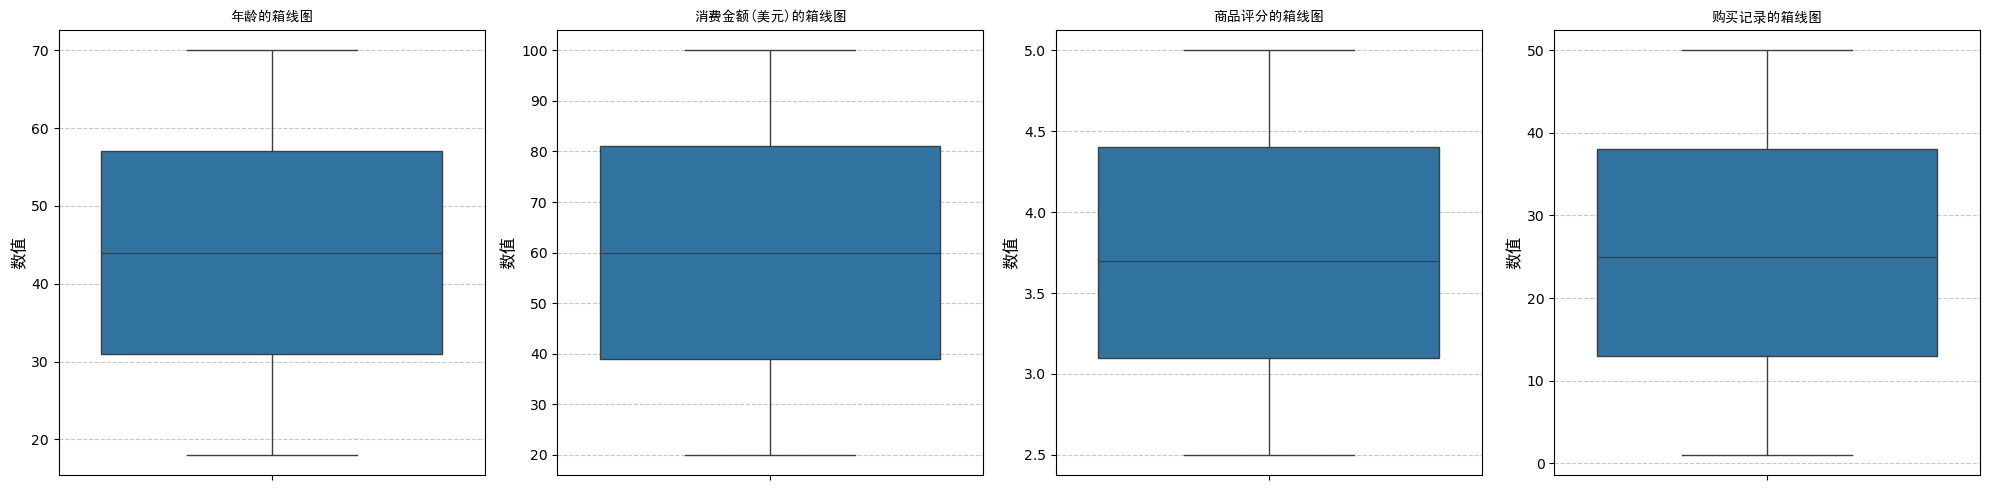

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 设置matplotlib字体，使用SimHei或其他支持中文的字体
font_path = r"E:\software\SimHei font\SimHei\SimHei.ttf"  # 这里使用原始字符串 (r) 防止路径中的反斜杠被转义
font_prop = font_manager.FontProperties(fname=font_path)

# 更新feature_map，确保图形标题是中文
feature_map = {
    '年龄': '年龄',
    '消费金额(美元)': '消费金额(美元)',
    '商品评分': '商品评分',
    '购买记录': '购买记录'
}

plt.figure(figsize=(20, 5))

# 遍历feature_map并绘制箱线图
for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'{col_name}的箱线图', fontsize=14, fontproperties=font_prop)
    plt.ylabel('数值', fontsize=12, fontproperties=font_prop)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [107]:
# 检查数据框的所有列名
print(data.columns)


Index(['顾客ID', '年龄', '性别', '购买的商品', '类别', '消费金额(美元)', '地点', '尺码', '颜色', '季节',
       '商品评分', '订阅状态', '支付方式', '运输方式', '是否应用折扣', '是否使用优惠码', '购买记录', '首选支付方式',
       '购买频率'],
      dtype='object')


初步检查未发现缺失值、重复值以及异常值

In [110]:
data.describe().T

count         mean          std   min     25%     50%      75%  \
顾客ID      3900.0  1950.500000  1125.977353   1.0  975.75  1950.5  2925.25   
年龄        3900.0    44.068462    15.207589  18.0   31.00    44.0    57.00   
消费金额(美元)  3900.0    59.764359    23.685392  20.0   39.00    60.0    81.00   
商品评分      3900.0     3.749949     0.716223   2.5    3.10     3.7     4.40   
购买记录      3900.0    25.351538    14.447125   1.0   13.00    25.0    38.00   

             max  
顾客ID      3900.0  
年龄          70.0  
消费金额(美元)   100.0  
商品评分         5.0  
购买记录        50.0

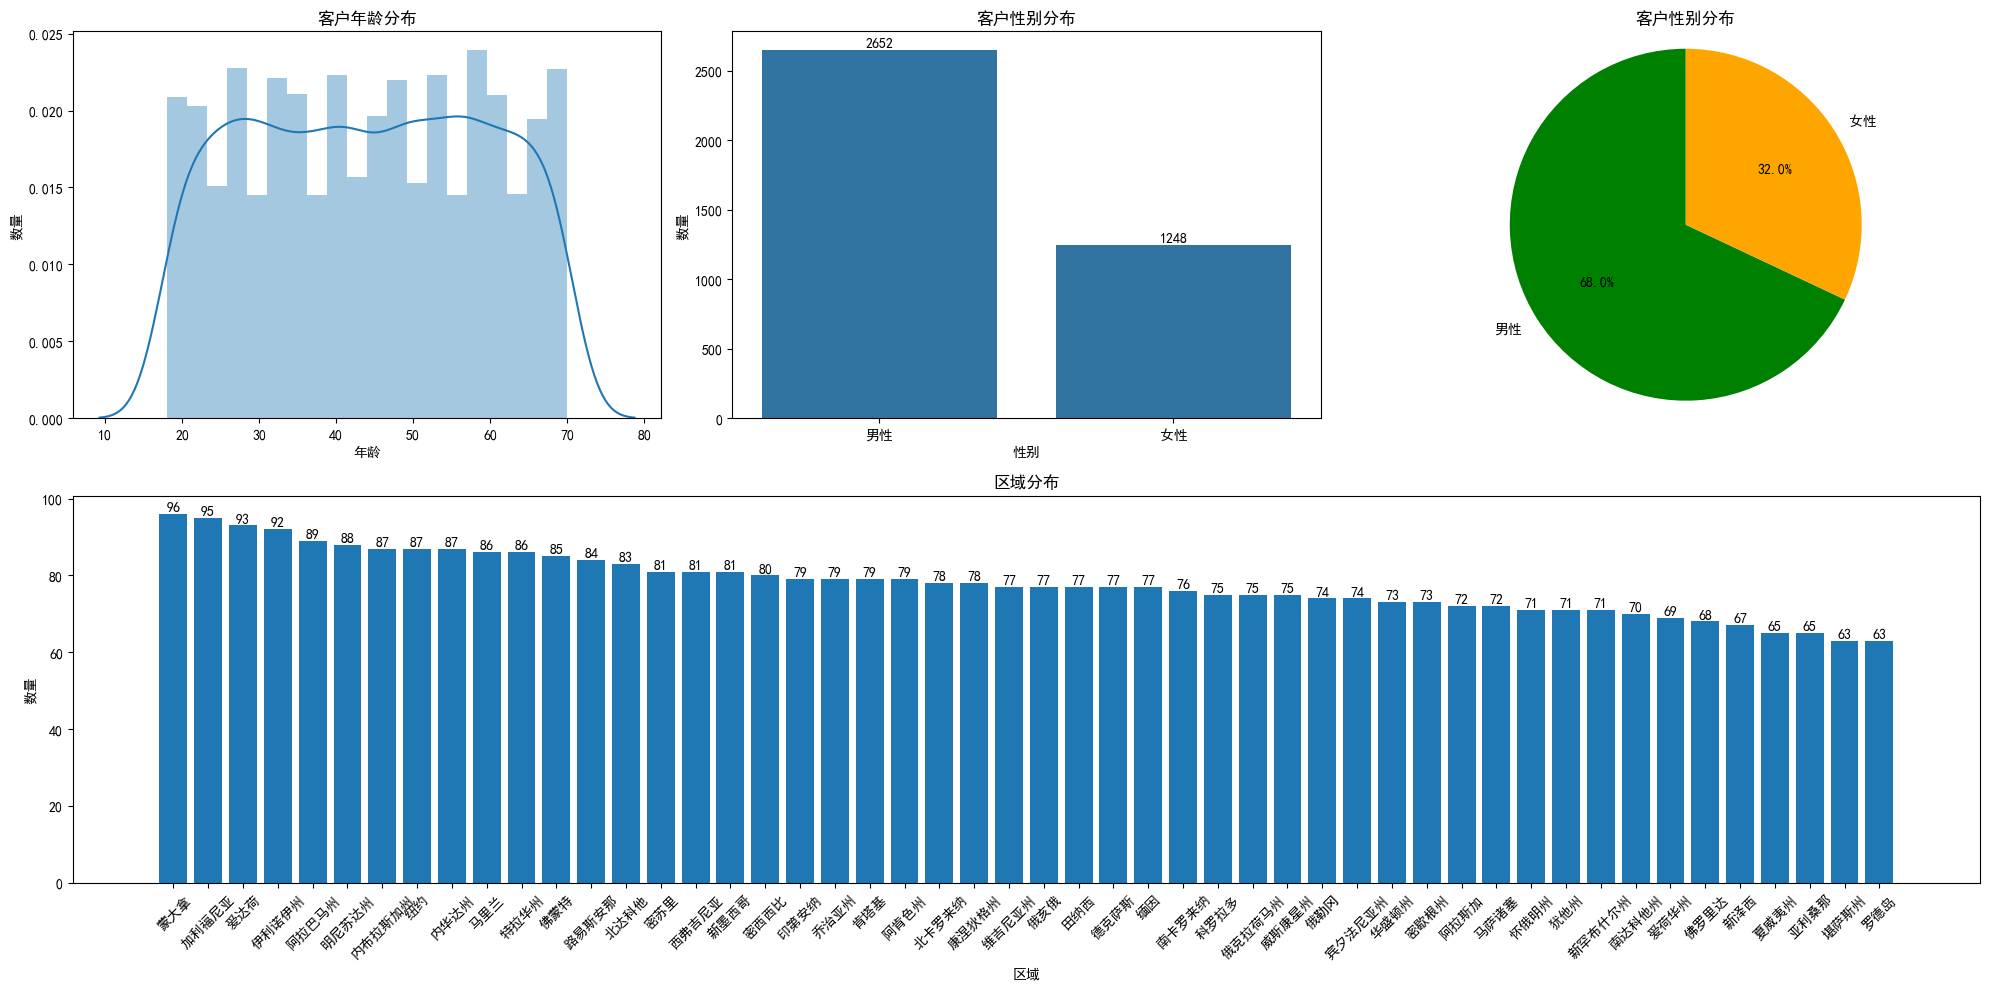

In [116]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
#绘制客户年龄的直方图
sns.distplot(data['年龄'],kde=True, bins=20,label='客户年龄')
plt.xlabel('年龄')
plt.ylabel('数量')
plt.title('客户年龄分布')

plt.subplot(2, 3, 2)
#绘制客户性别占比的柱状图
sns.countplot(x='性别', data=data)
plt.xlabel('性别')
plt.ylabel('数量')
plt.title('客户性别分布')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(2, 3, 3)
#绘制客户性别分布的饼图
plt.pie(data['性别'].value_counts(), labels=['男性', '女性'], autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('客户性别分布')
plt.axis('equal')

plt.subplot(2, 3, (4, 6))
#绘制location的分布柱状图
plt.bar (data['地点'].value_counts().index, data['地点'].value_counts().values)
plt.xlabel('区域')
plt.xticks(rotation=45)
plt.ylabel('数量')
plt.title('区域分布')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.tight_layout()
plt.show()

1、顾客性别分布中，男性占比68%，女性占比32%，表明男性客户居多,约是女性客户的2倍。
2、顾客所在区域中，蒙大拿州居多，共96例；加利福尼亚州次之，共95例；爱达荷州第三，共93例。堪萨斯州和罗得岛州的顾客数量最少，均为63例。

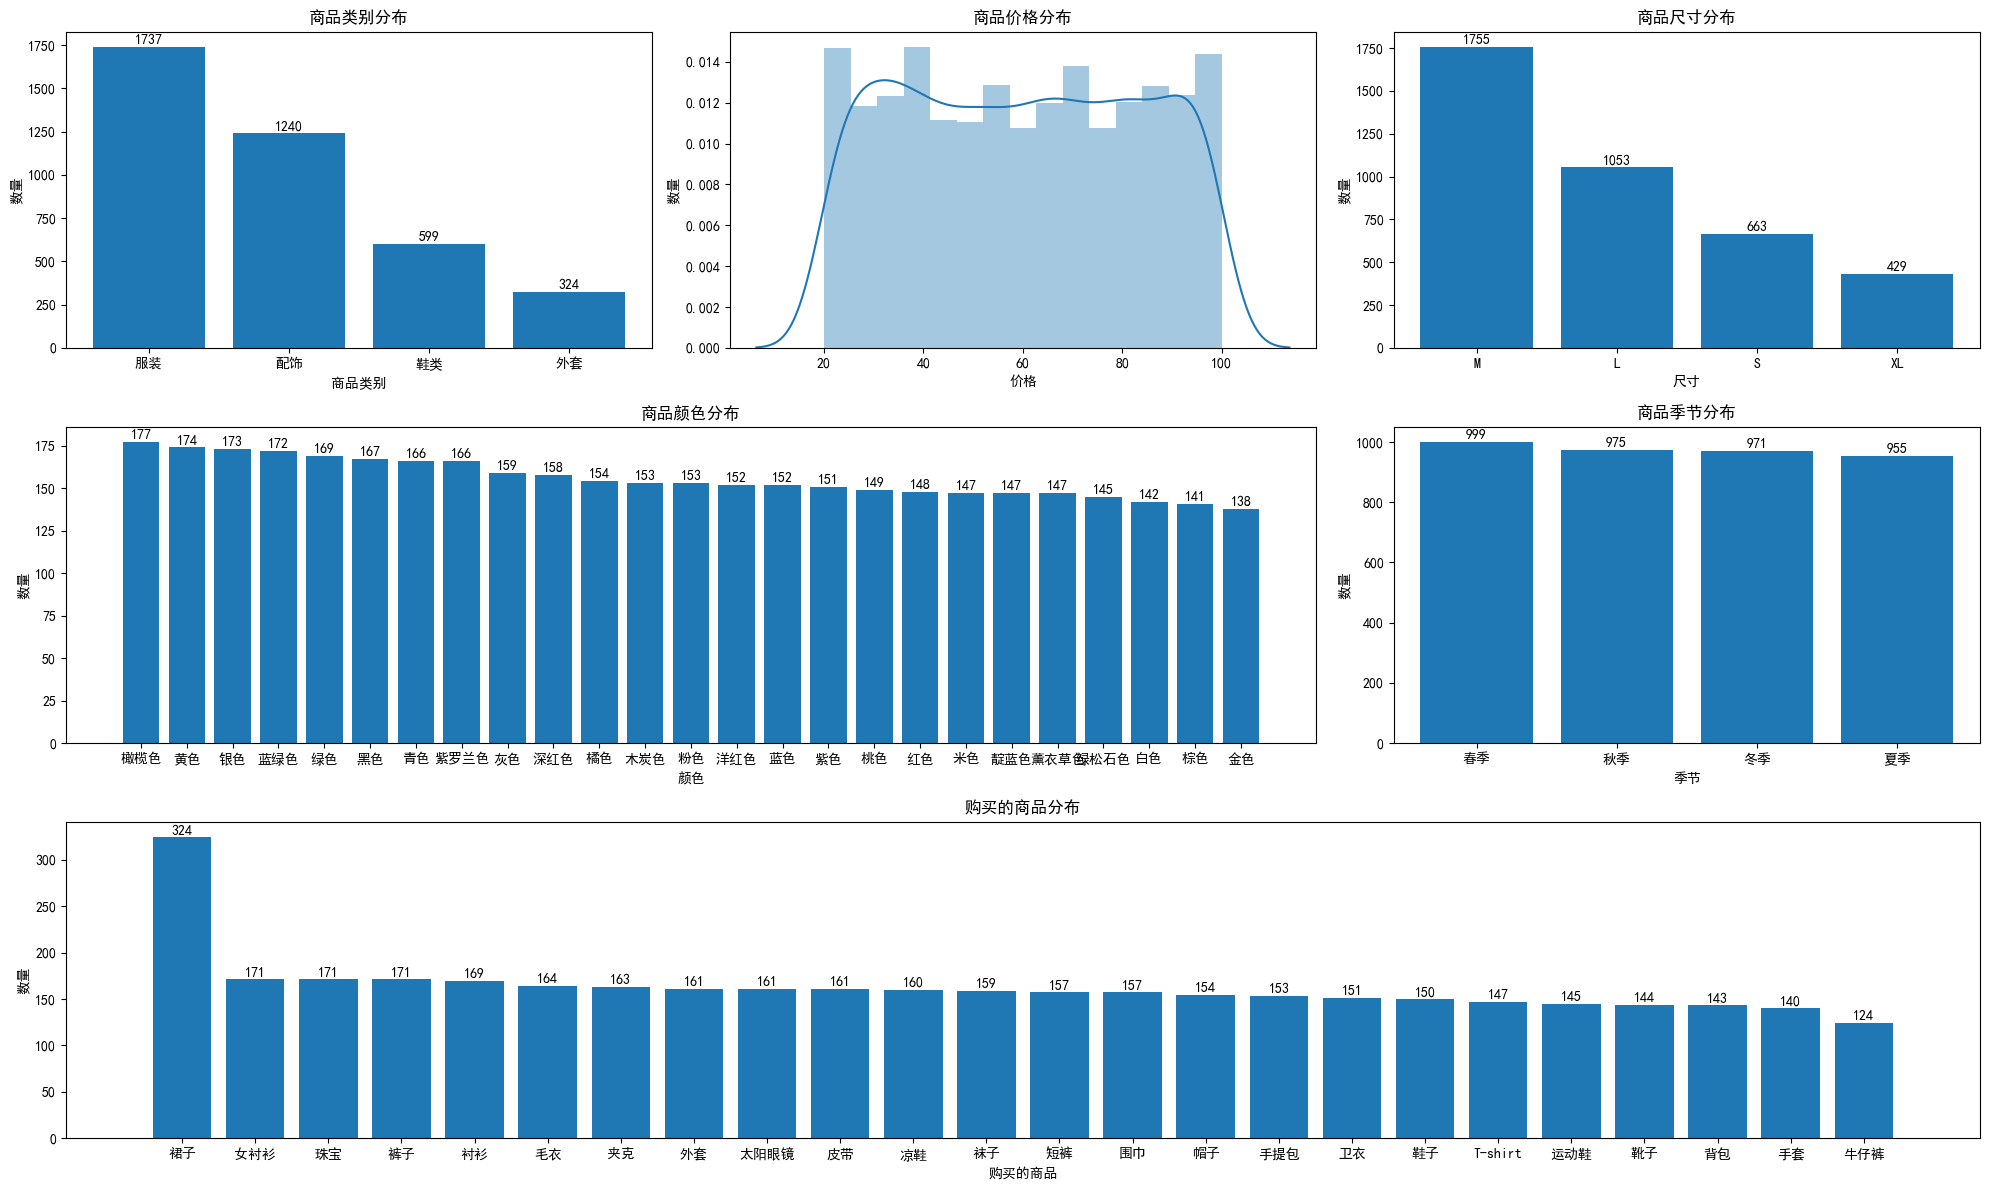

In [122]:
# 顾客购买的商品情况
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
#绘制购买商品的种类分布柱状图
category_count = data['类别'].value_counts()
plt.bar(x=category_count.index, height=category_count.values)
plt.title('商品类别分布')
plt.xlabel('商品类别')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3, 3, 2)
#绘制购买商品的价格分布直方图
sns.distplot(data['消费金额(美元)'], kde=True)
plt.title('商品价格分布')
plt.xlabel('价格')
plt.ylabel('数量')

plt.subplot(3, 3, 3)
#绘制购买商品的尺寸分布直方图
plt.bar(x=data['尺码'].value_counts().index, height=data['尺码'].value_counts().values)
plt.title('商品尺寸分布')
plt.xlabel('尺寸')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3, 3, (4, 5))
#绘制购买商品的颜色分布直方图
plt.bar(x=data['颜色'].value_counts().index, height=data['颜色'].value_counts().values)
plt.title('商品颜色分布')
plt.xlabel('颜色')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3, 3, 6)
#绘制购买商品的季节分布直方图
plt.bar(x=data['季节'].value_counts().index, height=data['季节'].value_counts().values)
plt.title('商品季节分布')
plt.xlabel('季节')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.subplot(3, 3, (7, 9))
#绘制商品类别的分布图
plt.bar(x=data['购买的商品'].value_counts().index, height=data['购买的商品'].value_counts().values)
plt.title('购买的商品分布')
plt.xlabel('购买的商品')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

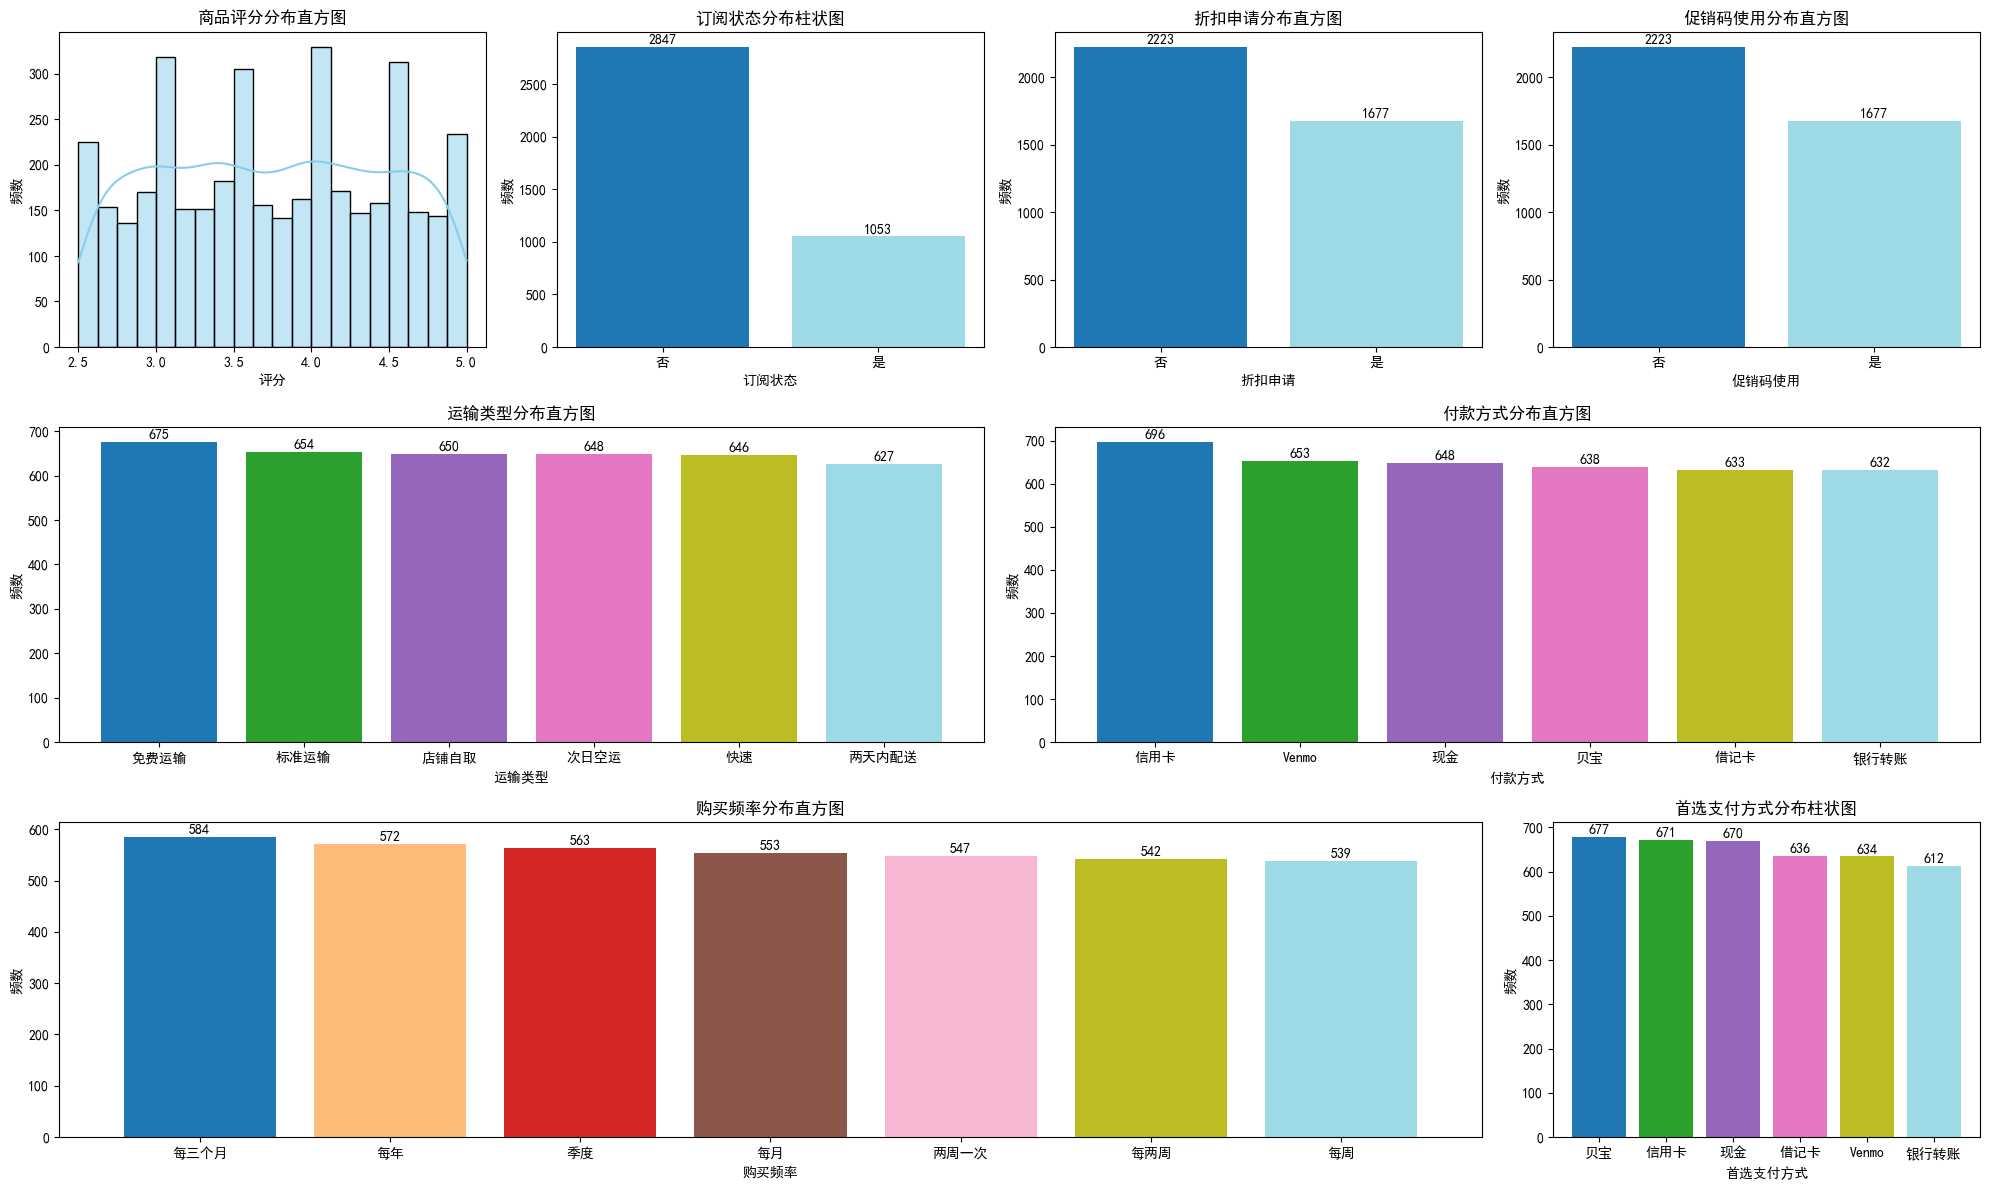

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 12))

# 商品评分分布直方图
plt.subplot(3, 4, 1)
sns.histplot(data['商品评分'], bins=20, kde=True, color='skyblue')  # 设置颜色
plt.title('商品评分分布直方图')
plt.xlabel('评分')
plt.ylabel('频数')

# 订阅状态分布柱状图
plt.subplot(3, 4, 2)
subscription_counts = data['订阅状态'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(subscription_counts)))  # 使用不同的颜色
plt.bar(x=subscription_counts.index, height=subscription_counts.values, color=colors)
plt.title('订阅状态分布柱状图')
plt.xlabel('订阅状态')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 折扣申请分布直方图
plt.subplot(3, 4, 3)
discount_counts = data['是否应用折扣'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(discount_counts)))  # 使用不同的颜色
plt.bar(x=discount_counts.index, height=discount_counts.values, color=colors)
plt.title('折扣申请分布直方图')
plt.xlabel('折扣申请')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 促销码使用分布直方图
plt.subplot(3, 4, 4)
promo_counts = data['是否使用优惠码'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(promo_counts)))  # 使用不同的颜色
plt.bar(x=promo_counts.index, height=promo_counts.values, color=colors)
plt.title('促销码使用分布直方图')
plt.xlabel('促销码使用')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 运输类型分布直方图
plt.subplot(3, 4, (5, 6))
shipping_counts = data['运输方式'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(shipping_counts)))  # 使用不同的颜色
plt.bar(x=shipping_counts.index, height=shipping_counts.values, color=colors)
plt.title('运输类型分布直方图')
plt.xlabel('运输类型')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 付款方式分布直方图
plt.subplot(3, 4, (7, 8))
payment_counts = data['支付方式'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(payment_counts)))  # 使用不同的颜色
plt.bar(x=payment_counts.index, height=payment_counts.values, color=colors)
plt.title('付款方式分布直方图')
plt.xlabel('付款方式')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 购买频率分布直方图
plt.subplot(3, 4, (9, 11))
purchase_counts = data['购买频率'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(purchase_counts)))  # 使用不同的颜色
plt.bar(x=purchase_counts.index, height=purchase_counts.values, color=colors)
plt.title('购买频率分布直方图')
plt.xlabel('购买频率')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 首选支付方式分布柱状图
plt.subplot(3, 4, 12)
payment_preference_counts = data['首选支付方式'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(payment_preference_counts)))  # 使用不同的颜色
plt.bar(x=payment_preference_counts.index, height=payment_preference_counts.values, color=colors)
plt.title('首选支付方式分布柱状图')
plt.xlabel('首选支付方式')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


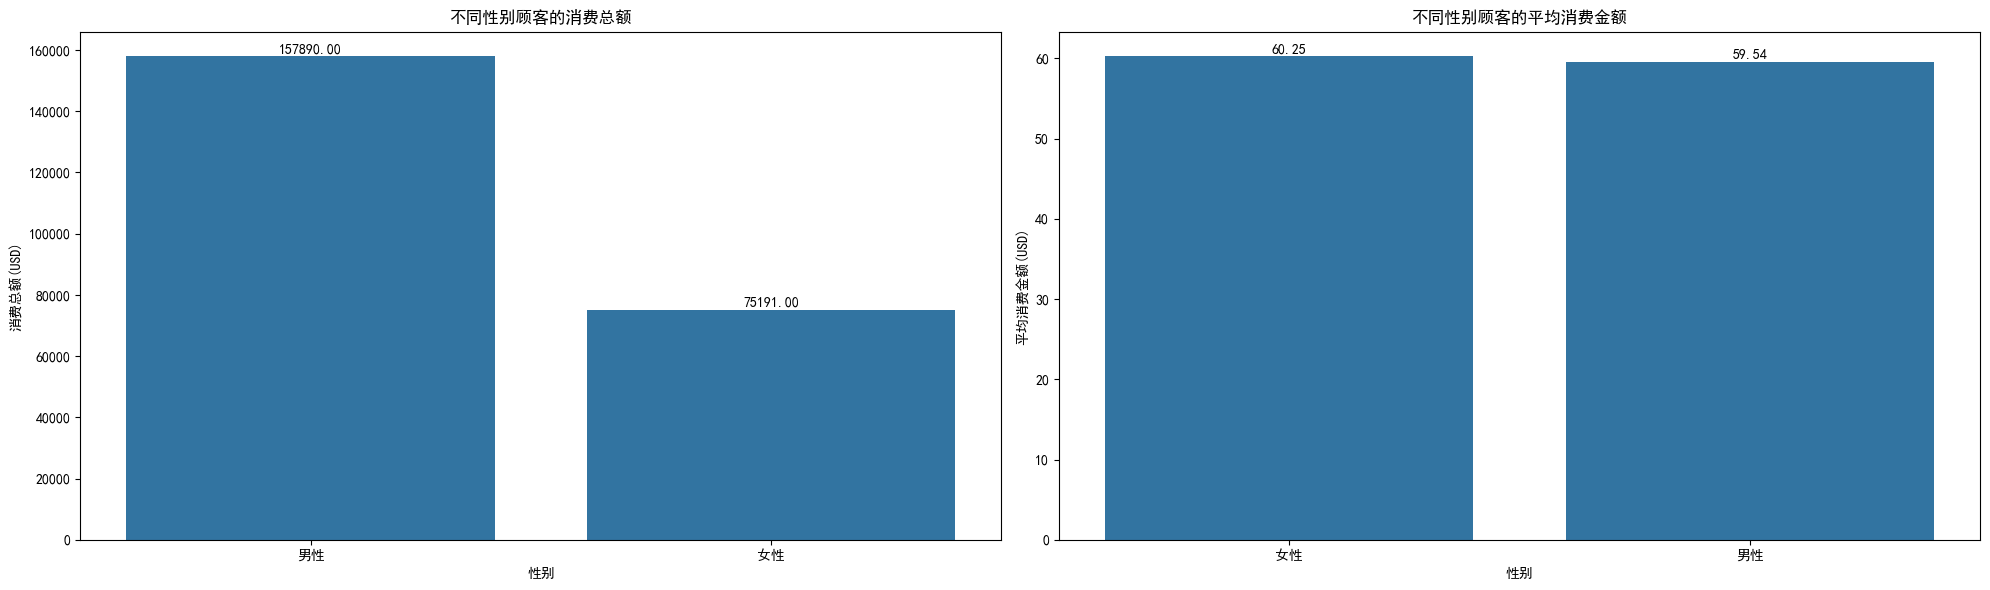

In [125]:
#不同性别顾客的消费金额分析
gender_sales = data.groupby('性别')['消费金额(美元)'].sum().sort_values(ascending=False)
gender_avg_purchase = data.groupby('性别')['消费金额(美元)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title('不同性别顾客的消费总额')
plt.xlabel('性别')
plt.ylabel('消费总额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(1, 2, 2)
sns.barplot(x=gender_avg_purchase.index, y=gender_avg_purchase.values)
plt.title('不同性别顾客的平均消费金额')
plt.xlabel('性别')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

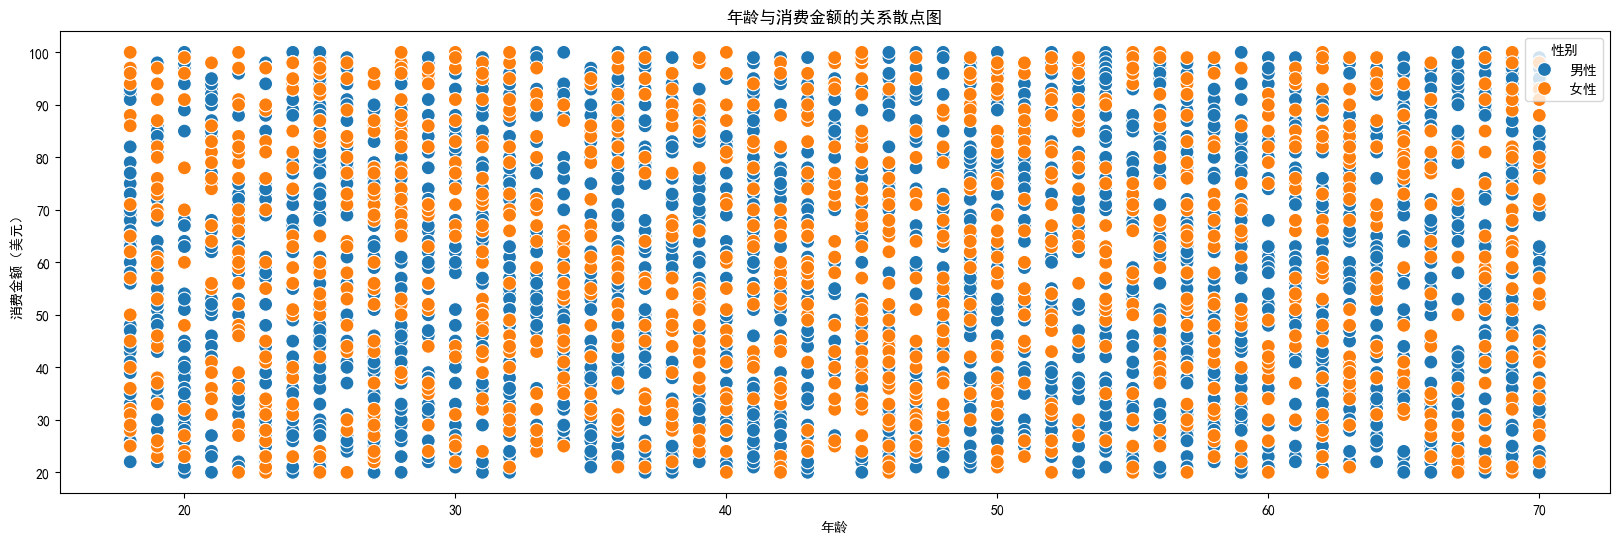

In [126]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='年龄', y='消费金额(美元)', hue='性别', data=data, s=100)
plt.title('年龄与消费金额的关系散点图')
plt.xlabel('年龄')
plt.ylabel('消费金额（美元）')
plt.show()

不同商品种类的消费金额分布

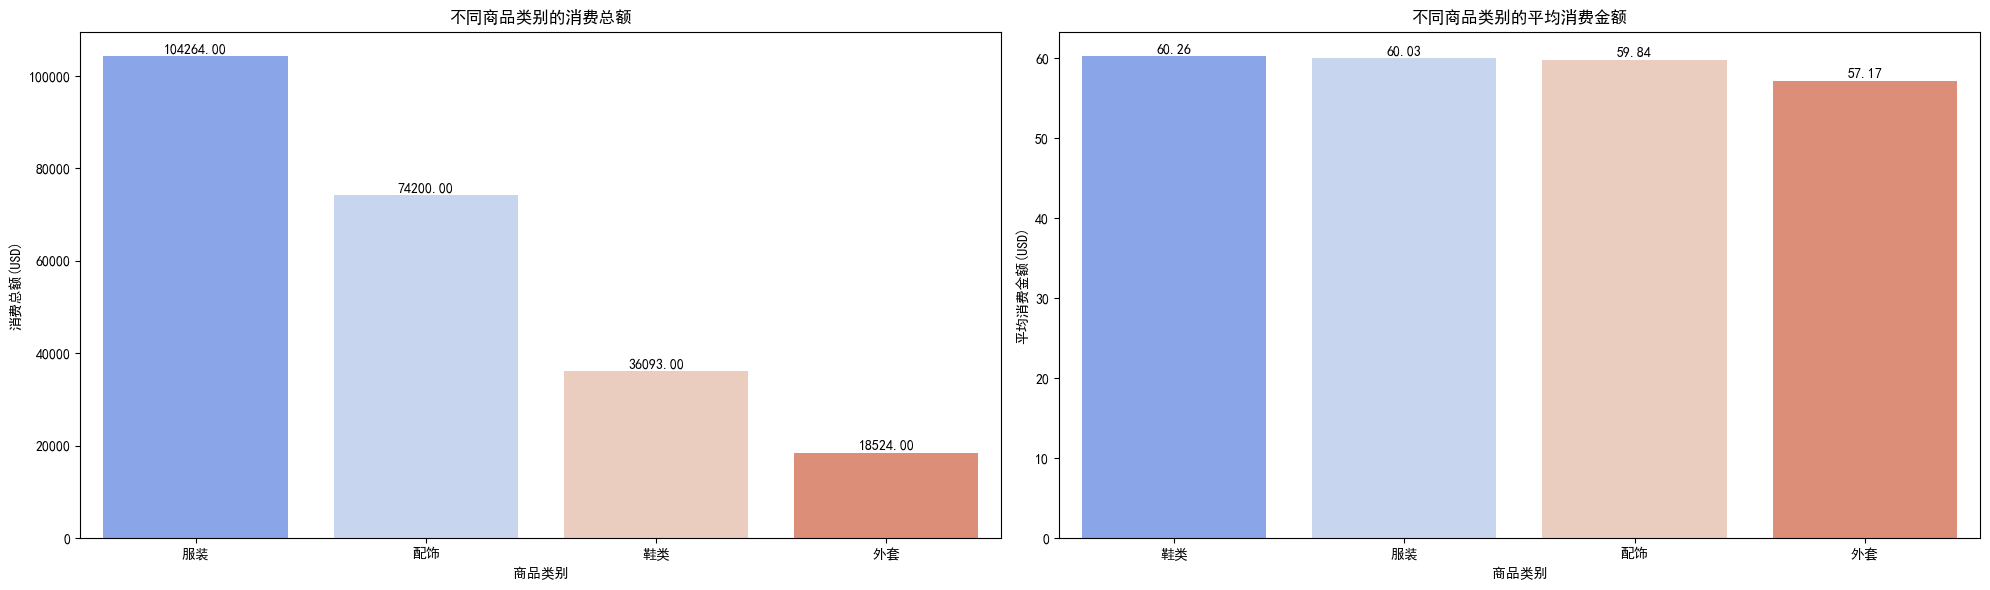

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# 商品类别的销售情况
category_sales = data.groupby('类别')['消费金额(美元)'].sum().sort_values(ascending=False)

# 不同类别商品的平均消费金额
category_avg_purchase = data.groupby('类别')['消费金额(美元)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

# 总消费金额柱状图
plt.subplot(1, 2, 1)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')  # 添加颜色调色板
plt.title('不同商品类别的消费总额')
plt.xlabel('商品类别')
plt.ylabel('消费总额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# 平均消费金额柱状图
plt.subplot(1, 2, 2)
sns.barplot(x=category_avg_purchase.index, y=category_avg_purchase.values, palette='coolwarm')  # 添加颜色调色板
plt.title('不同商品类别的平均消费金额')
plt.xlabel('商品类别')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()


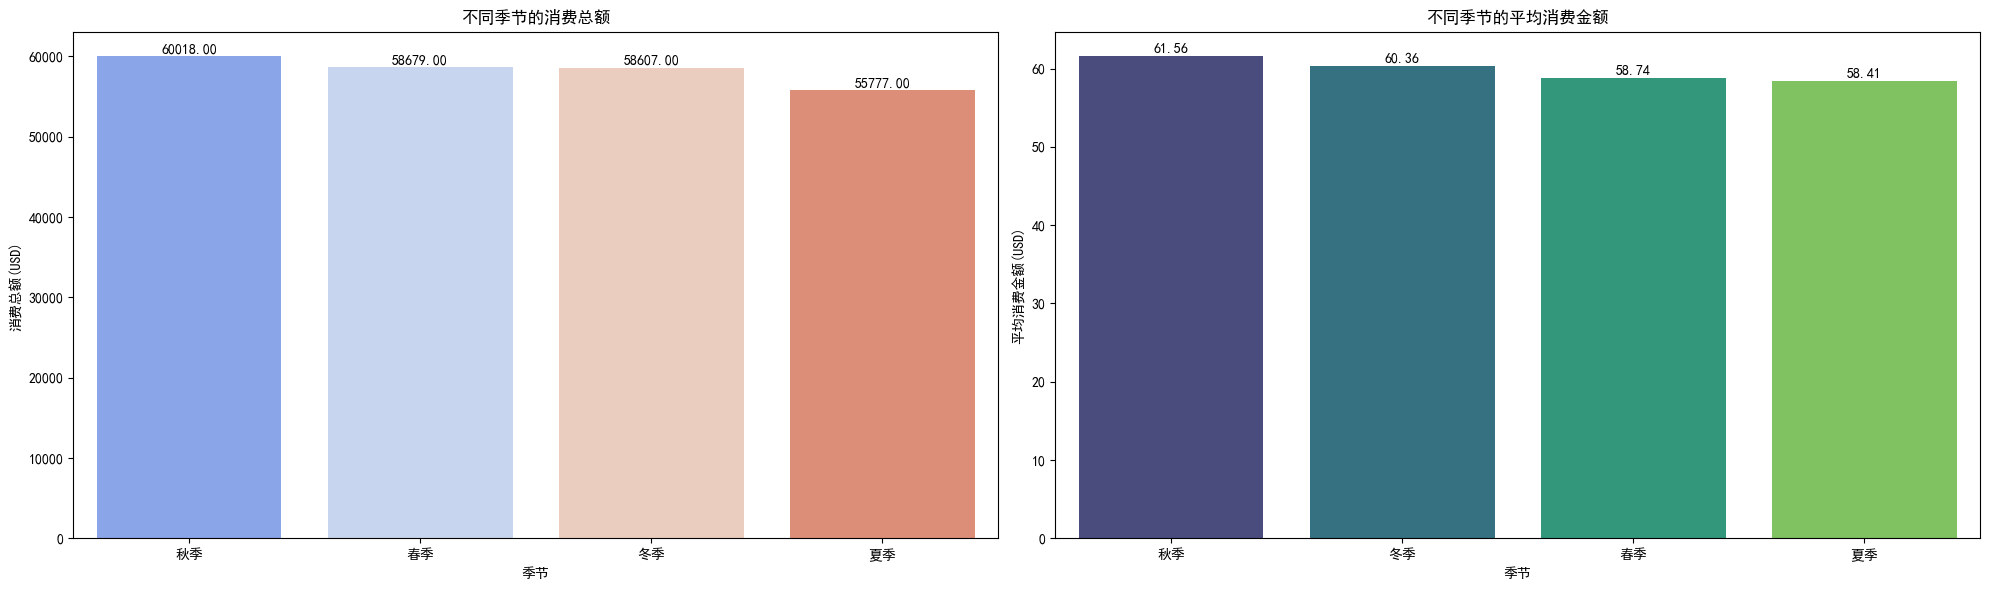

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# 不同季节的商品销售额分析
season_sales = data.groupby('季节')['消费金额(美元)'].sum().sort_values(ascending=False)

# 不同季节的平均消费金额
season_avg_purchase = data.groupby('季节')['消费金额(美元)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

# 不同季节的消费总额
plt.subplot(1, 2, 1)
sns.barplot(x=season_sales.index, y=season_sales.values, palette='coolwarm')  # 使用彩色调色板
plt.title('不同季节的消费总额')
plt.xlabel('季节')
plt.ylabel('消费总额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 不同季节的平均消费金额
plt.subplot(1, 2, 2)
sns.barplot(x=season_avg_purchase.index, y=season_avg_purchase.values, palette='viridis')  # 使用彩色调色板
plt.title('不同季节的平均消费金额')
plt.xlabel('季节')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


秋季的消费总额最高，共60018美元，平均消费金额也最高，为61.56美元。
春季的消费总额位居第二，共58679美元，平均消费金额位居第三，为58.74美元。
冬季的消费总额位居第三，共58607美元，平均消费金额位居第二，为60.36美元。
夏季的消费总额位居第四，共56777美元，平均消费金额位居第四，58.41美元。

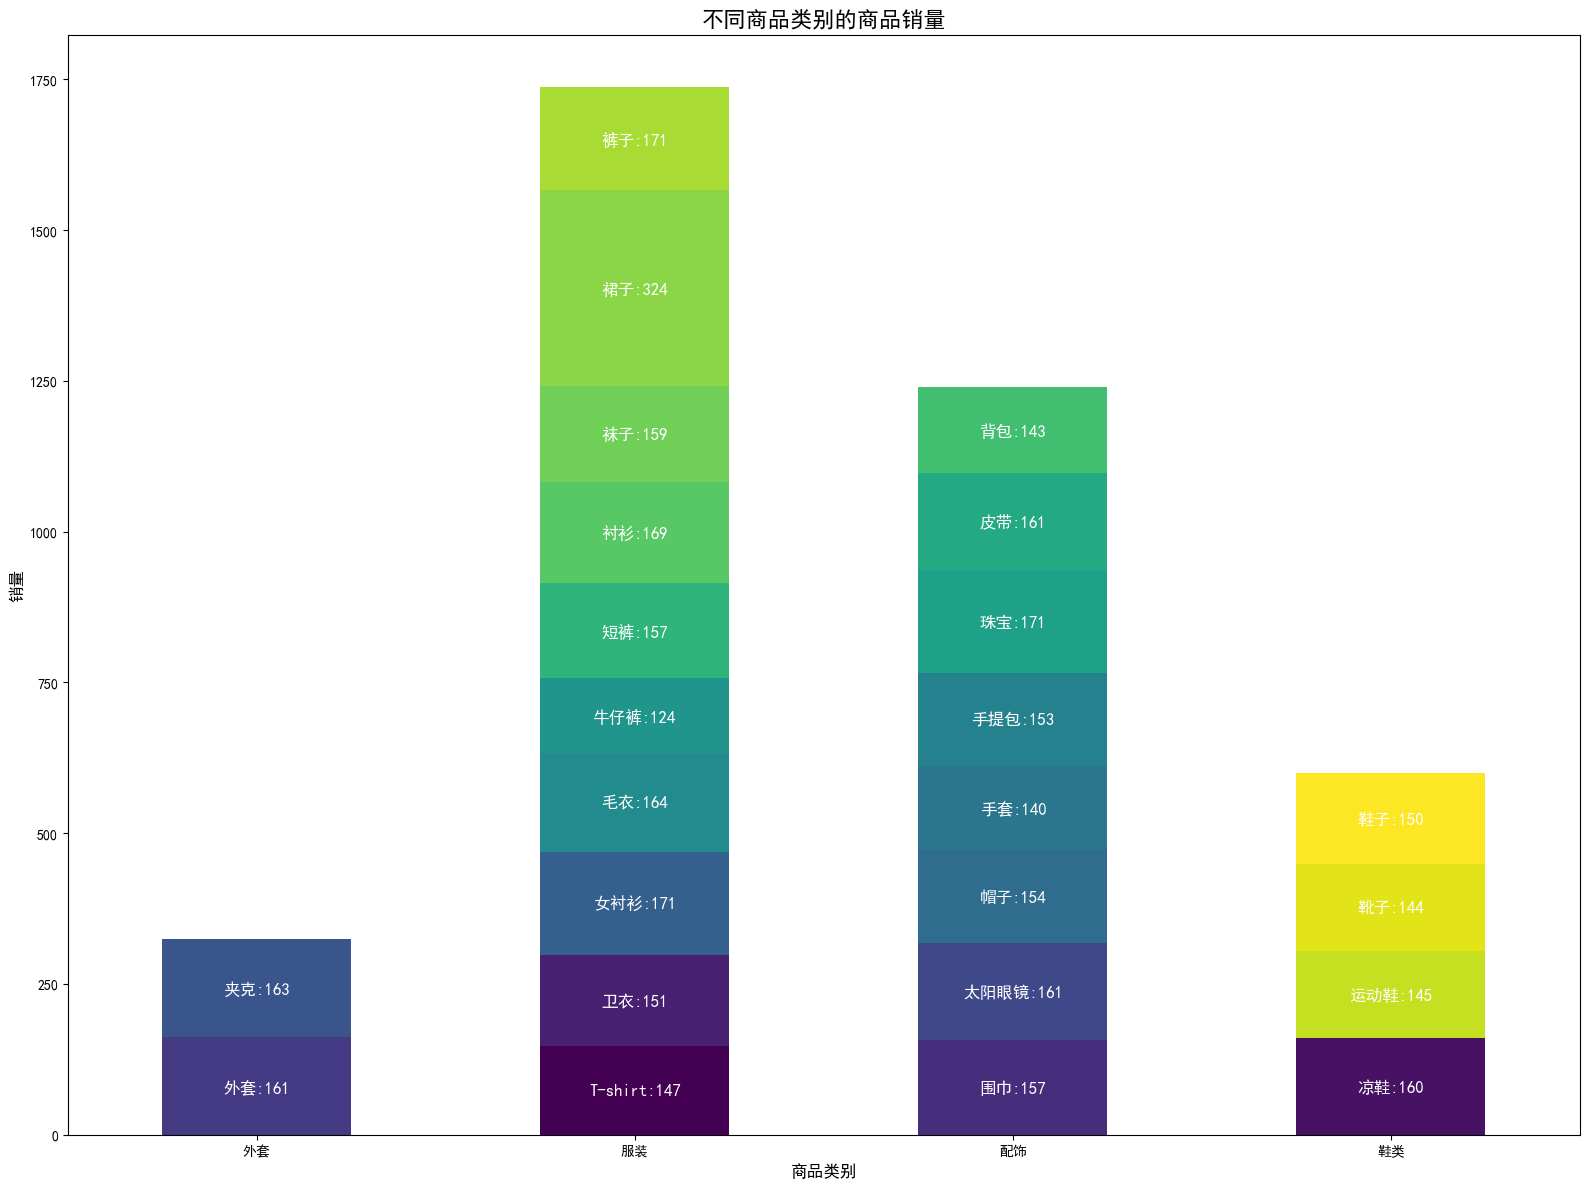

In [155]:
# 筛选出四个类别下的商品数据
categories_of_interest = ['服装', '配饰', '鞋类', '外套']
filtered_data = data[data['类别'].isin(categories_of_interest)]

# 商品种类分析
item_counts = filtered_data.groupby('类别')['购买的商品'].value_counts().unstack(fill_value=0)

# 创建堆叠条形图
ax = item_counts.plot(kind='bar', stacked=True, figsize=(16, 12), colormap='viridis', legend=False)

# 设置图表标题和坐标轴标签
ax.set_title('不同商品类别的商品销量', fontsize=16)
ax.set_xlabel('商品类别', fontsize=12)
ax.set_ylabel('销量', fontsize=12)

# 优化坐标轴刻度显示
ax.yaxis.get_major_formatter().set_scientific(False)

# 在每个颜色段上标注商品名称和数量
for i, category in enumerate(item_counts.index):
    y_offset = 0
    for item, count in item_counts.loc[category].items():
        if count > 0:
            ax.text(i, y_offset + count / 2, f'{item}:{count}', ha='center', va='center', fontsize=12, color='white',fontweight='bold')
            y_offset += count

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


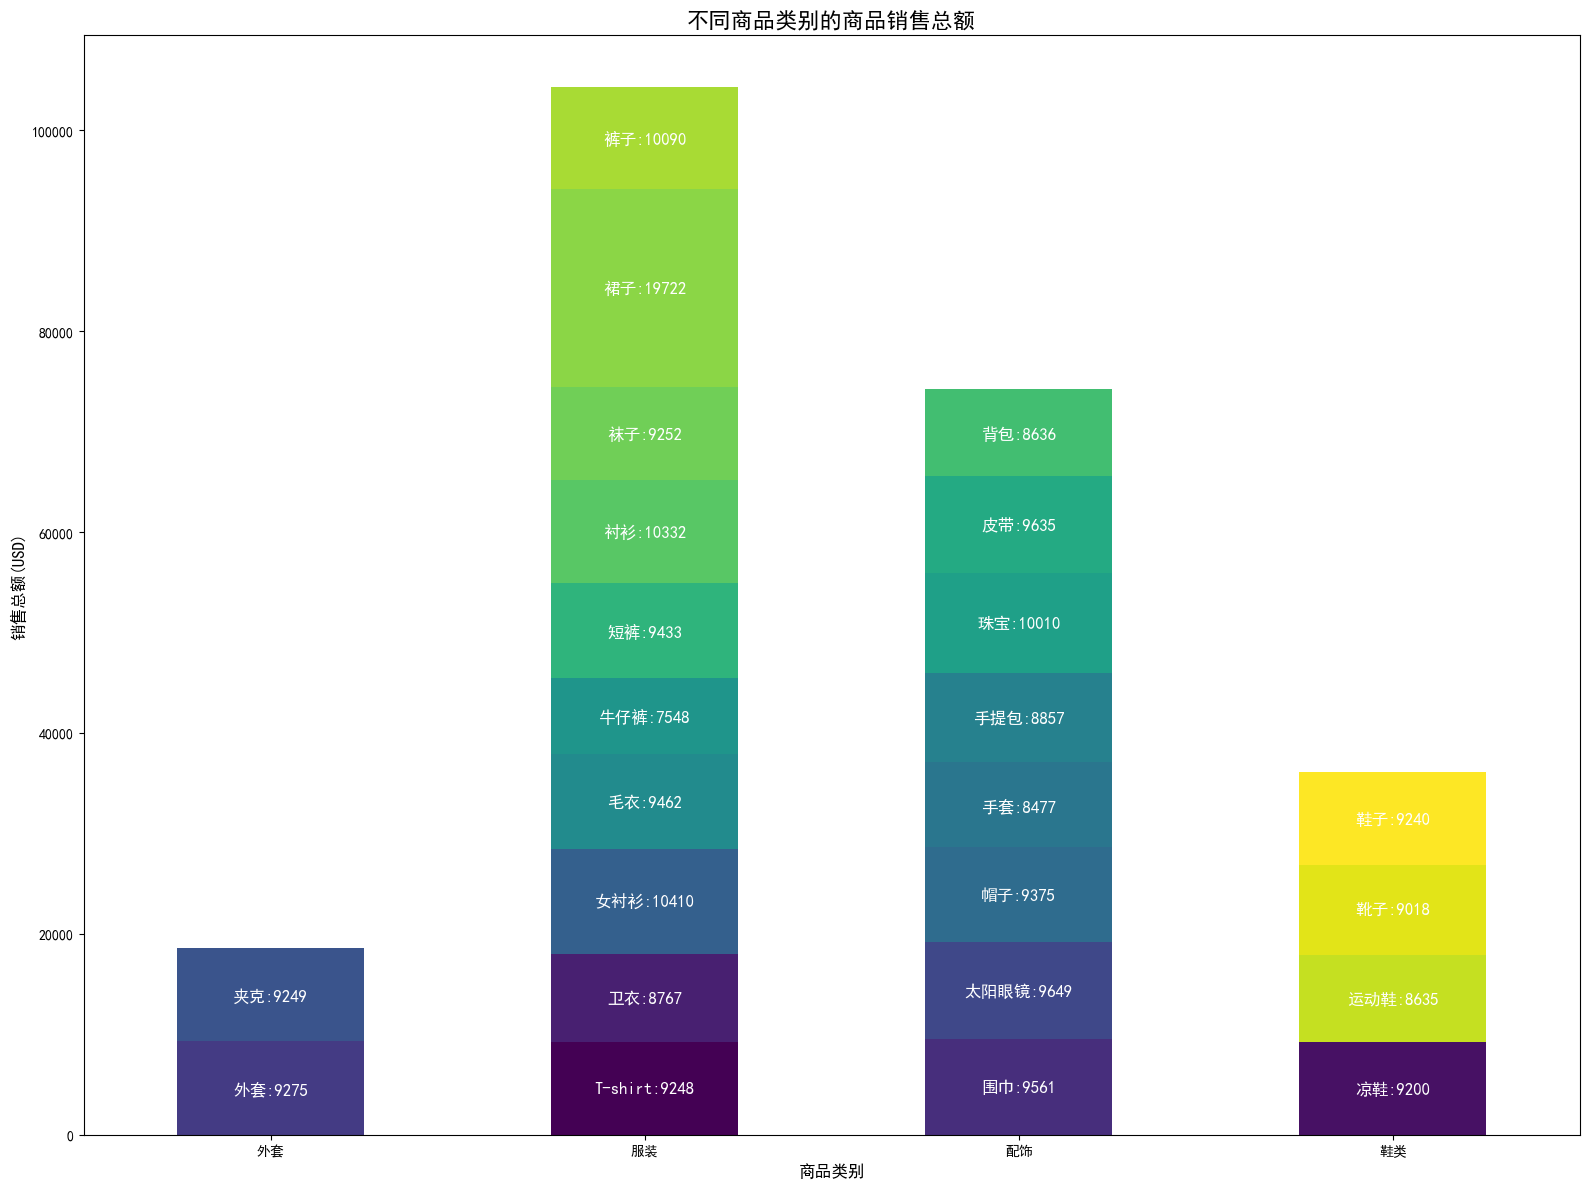

In [156]:
# 计算每个商品在每个类别下的销售总额
sales_amount = filtered_data.groupby('类别').apply(lambda x: x.groupby('购买的商品')['消费金额(美元)'].sum())

# 将sales_amount转换为DataFrame并进行适当的调整
sales_amount_df = sales_amount.unstack(fill_value=0)

# 创建堆叠条形图
ax = sales_amount_df.plot(kind='bar', stacked=True, figsize=(16, 12), colormap='viridis', legend=False)

# 设置图表标题和坐标轴标签
ax.set_title('不同商品类别的商品销售总额', fontsize=16)
ax.set_xlabel('商品类别', fontsize=12)
ax.set_ylabel('销售总额(USD)', fontsize=12)

# 优化坐标轴刻度显示
ax.yaxis.get_major_formatter().set_scientific(False)

# 在每个颜色段上标注商品名称和销售总额
for i, category in enumerate(sales_amount_df.index):
    y_offset = 0
    for item, amount in sales_amount_df.loc[category].items():
        if amount > 0:
            ax.text(i, y_offset + amount / 2, f'{item}:{amount}', ha='center', va='center', fontsize=12, color='white',fontweight='bold')
            y_offset += amount

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


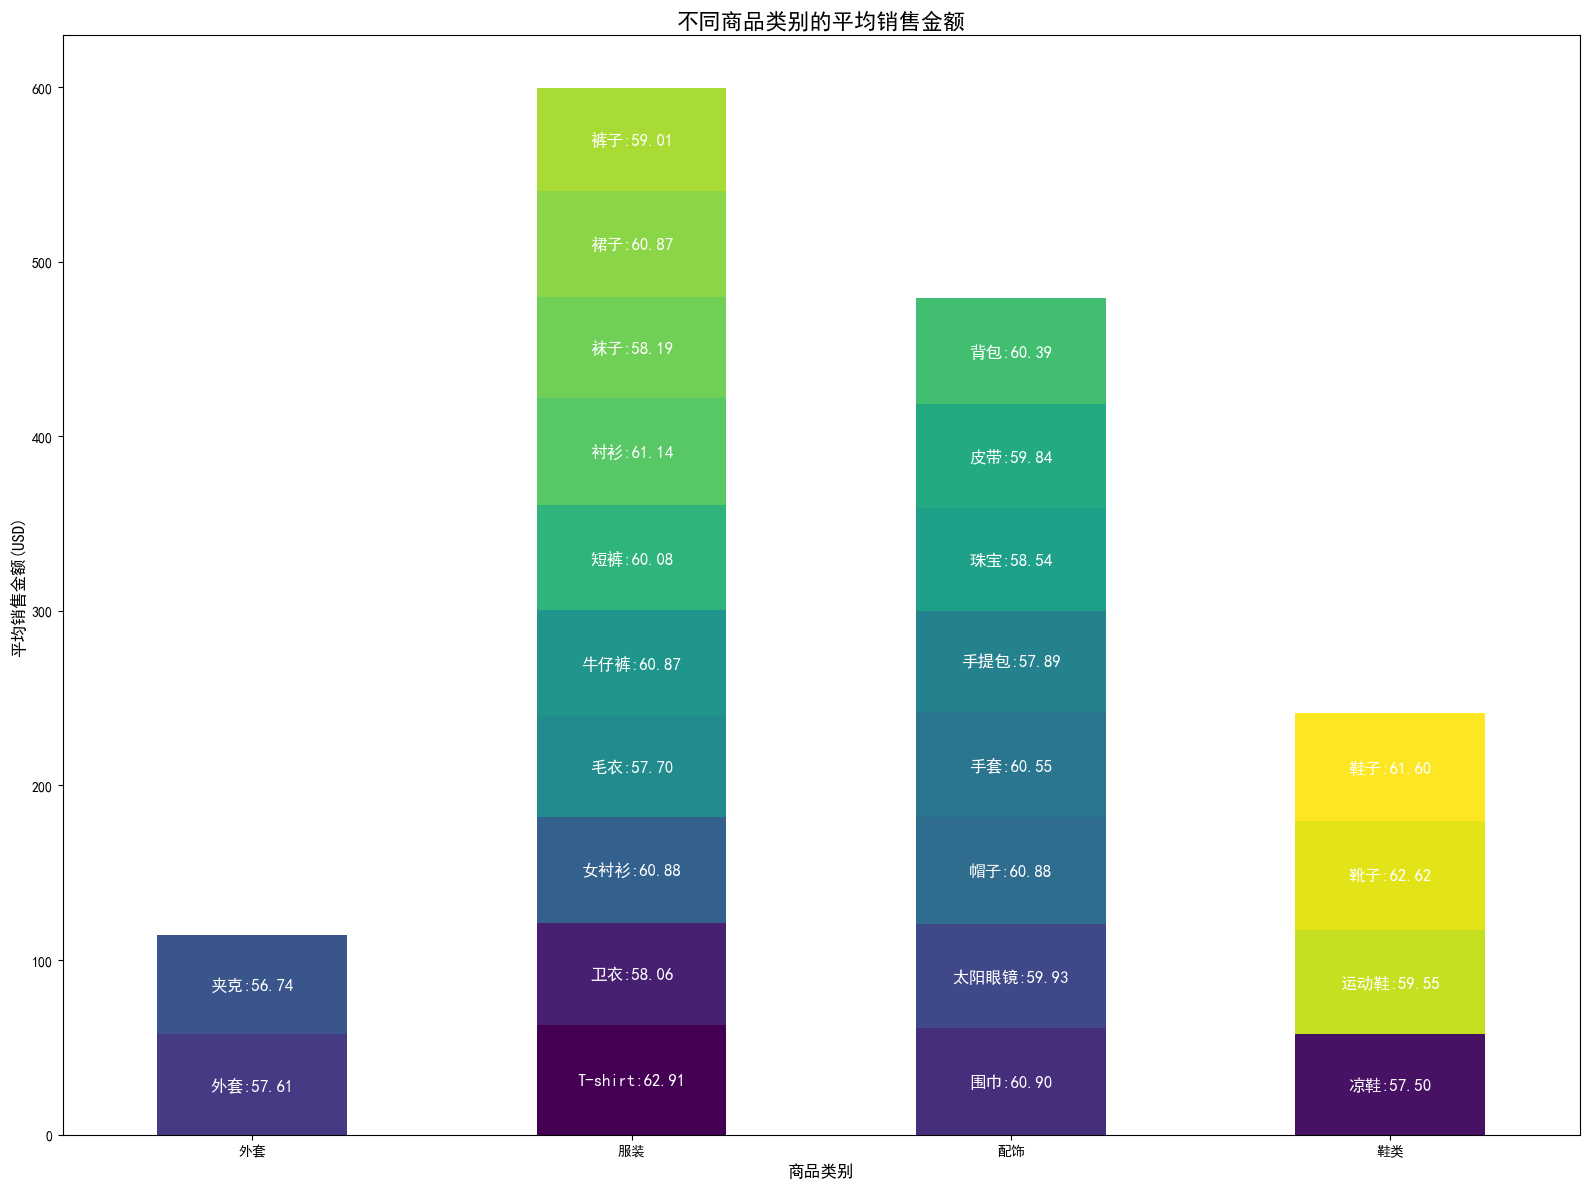

In [157]:
# 计算每个商品在每个类别下的平均销售金额
average_sales_amount = sales_amount_df.div(item_counts)

# 创建堆叠条形图
ax = average_sales_amount.plot(kind='bar', stacked=True, figsize=(16,12), colormap='viridis', legend=False)

# 设置图表标题和坐标轴标签
ax.set_title('不同商品类别的平均销售金额', fontsize=16)
ax.set_xlabel('商品类别', fontsize=12)
ax.set_ylabel('平均销售金额(USD)', fontsize=12)

# 优化坐标轴刻度显示
ax.yaxis.get_major_formatter().set_scientific(False)

# 在每个颜色段上标注商品名称和平均销售金额
for i, category in enumerate(average_sales_amount.index):
    y_offset = 0
    for item, amount in average_sales_amount.loc[category].items():
        if not np.isnan(amount):
            ax.text(i, y_offset + amount / 2, f'{item}:{amount:.2f}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
            y_offset += amount

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

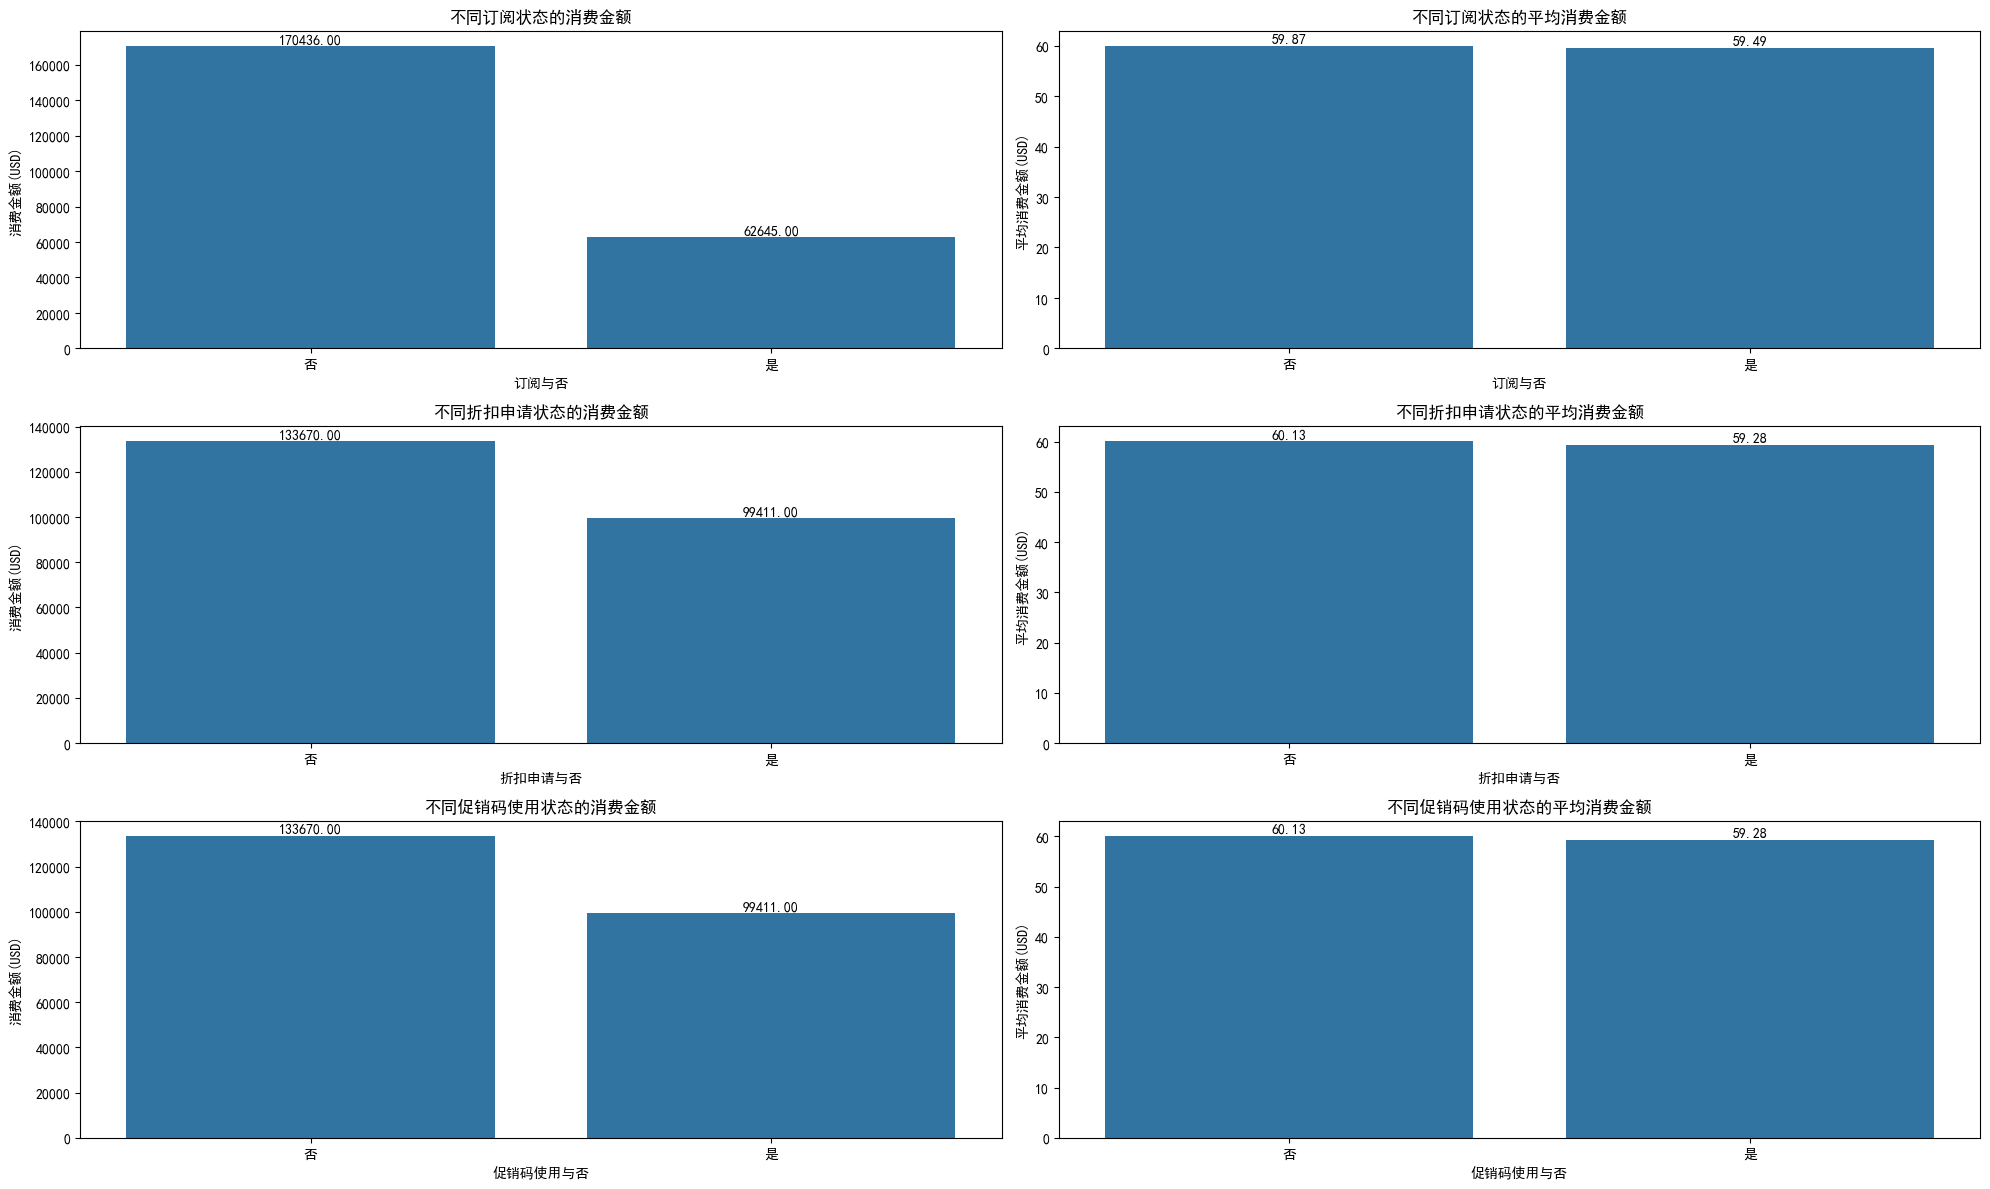

In [159]:
#不同购买习惯的消费金额分析
subscription_sales = data.groupby('订阅状态')['消费金额(美元)'].sum().sort_values(ascending=False)
subscription_avg_sales = data.groupby('订阅状态')['消费金额(美元)'].mean().sort_values(ascending=False)

discount_sales = data.groupby('是否应用折扣')['消费金额(美元)'].sum().sort_values(ascending=False)
discount_avg_sales = data.groupby('是否应用折扣')['消费金额(美元)'].mean().sort_values(ascending=False)

promo_sales = data.groupby('是否使用优惠码')['消费金额(美元)'].sum().sort_values(ascending=False)
promo_avg_sales = data.groupby('是否使用优惠码')['消费金额(美元)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.barplot(x=subscription_sales.index, y=subscription_sales.values)
plt.title('不同订阅状态的消费金额')
plt.xlabel('订阅与否')
plt.ylabel('消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,2)
sns.barplot(x=subscription_avg_sales.index, y=subscription_avg_sales.values)
plt.title('不同订阅状态的平均消费金额')
plt.xlabel('订阅与否')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,3)
sns.barplot(x=discount_sales.index, y=discount_sales.values)
plt.title('不同折扣申请状态的消费金额')
plt.xlabel('折扣申请与否')
plt.ylabel('消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,4)
sns.barplot(x=discount_avg_sales.index, y=discount_avg_sales.values)
plt.title('不同折扣申请状态的平均消费金额')
plt.xlabel('折扣申请与否')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,5)
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('不同促销码使用状态的消费金额')
plt.xlabel('促销码使用与否')
plt.ylabel('消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,6)
sns.barplot(x=promo_avg_sales.index, y=promo_avg_sales.values)
plt.title('不同促销码使用状态的平均消费金额')
plt.xlabel('促销码使用与否')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()


In [160]:
from scipy.stats import spearmanr

def plot_spearmanr(data,features,title,wide,height):
    # 计算斯皮尔曼相关性矩阵和p值矩阵
    spearman_corr_matrix = data[features].corr(method='spearman')
    pvals = data[features].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(len(data[features].columns))

    # 转换 p 值为星号
    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return ""

    # 应用转换函数
    pval_star = pvals.applymap(lambda x: convert_pvalue_to_asterisks(x))

    # 转换成 numpy 类型
    corr_star_annot = pval_star.to_numpy()

    # 定制 labels
    corr_labels = spearman_corr_matrix.to_numpy()
    p_labels = corr_star_annot
    shape = corr_labels.shape

    # 合并 labels
    labels = (np.asarray(["{0:.2f}\n{1}".format(data, p) for data, p in zip(corr_labels.flatten(), p_labels.flatten())])).reshape(shape)

    # 绘制热力图
    fig, ax = plt.subplots(figsize=(height, wide), dpi=100, facecolor="w")
    sns.heatmap(spearman_corr_matrix, annot=labels, fmt='', cmap='coolwarm',
                vmin=-1, vmax=1, annot_kws={"size":10, "fontweight":"bold"},
                linecolor="k", linewidths=.2, cbar_kws={"aspect":13}, ax=ax)

    ax.tick_params(bottom=False, labelbottom=True, labeltop=False,
                left=False, pad=1, labelsize=12)
    ax.yaxis.set_tick_params(labelrotation=0)

    # 自定义 colorbar 标签格式
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(direction="in", width=.5, labelsize=10)
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(["-1.00", "-0.50", "0.00", "0.50", "1.00"])
    cbar.outline.set_visible(True)
    cbar.outline.set_linewidth(.5)

    plt.title(title)
    plt.show()

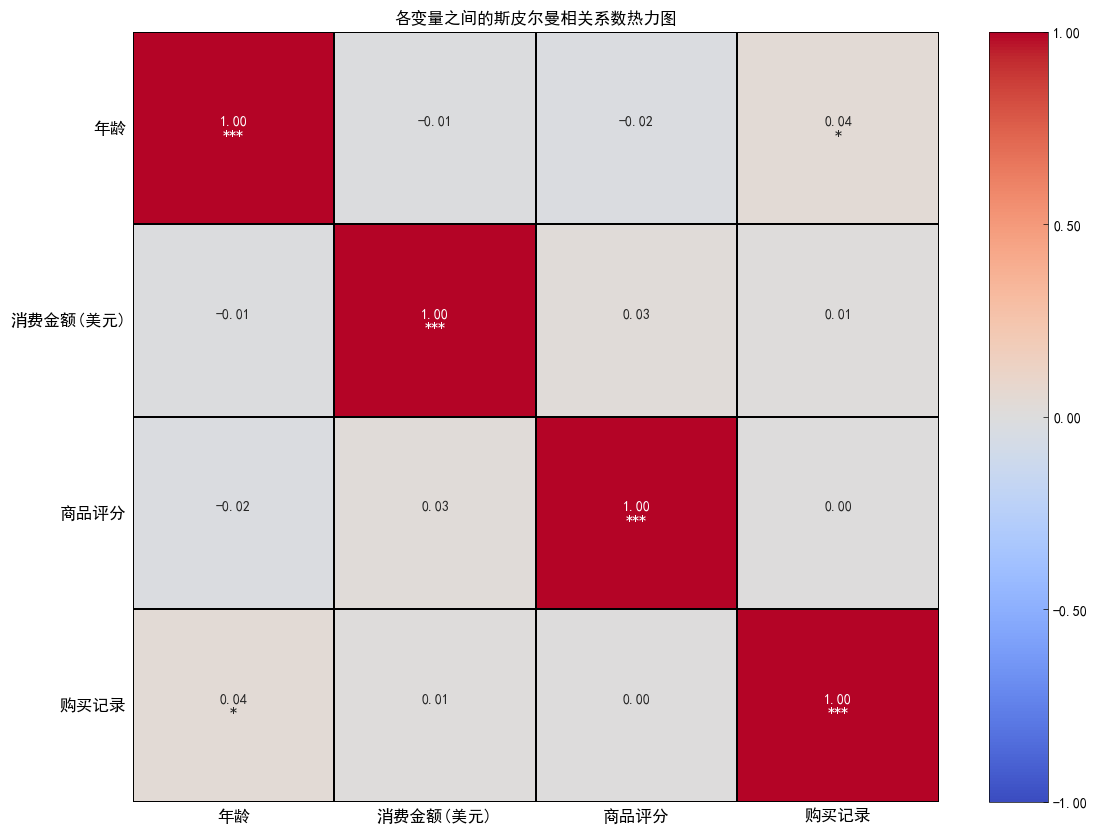

In [162]:
features = data.drop(['顾客ID'],axis=1).select_dtypes(include=['int64','float64']).columns.tolist()
plot_spearmanr(data,features,'各变量之间的斯皮尔曼相关系数热力图',10,13)

年龄和购买记录具有相关性，但是相关性非常弱。
消费金额、商品评分和购买记录不具有显著相关性。

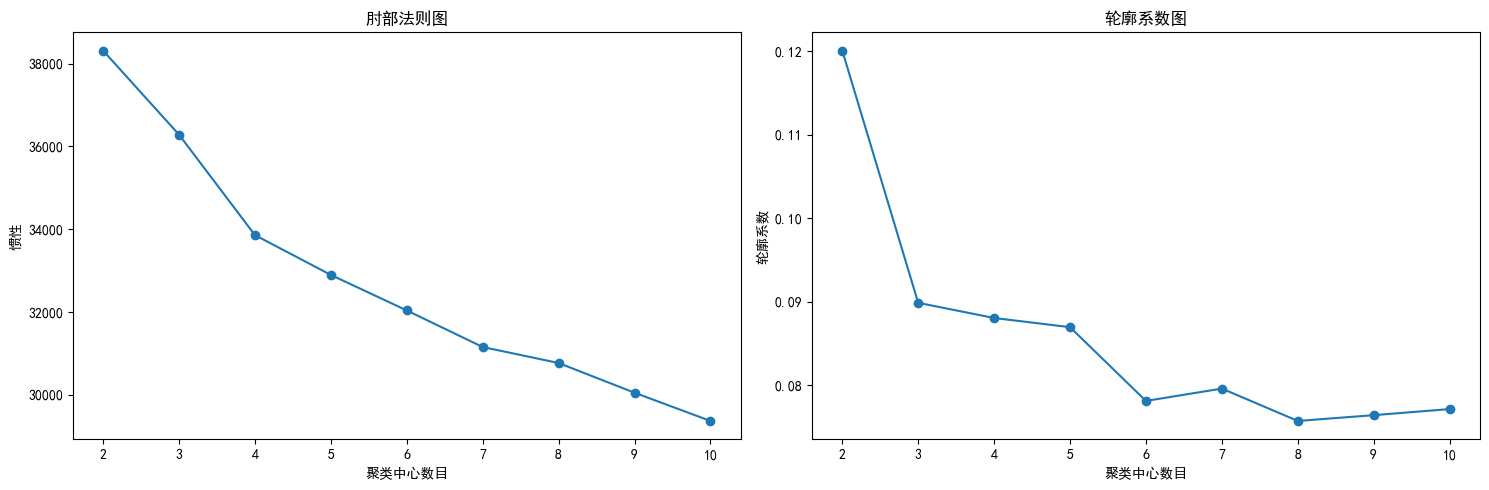

In [191]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 选择相关特征进行聚类
numerical_features = ['年龄', '消费金额(美元)', '商品评分', '购买记录']
categorical_features = ['性别','类别', '地点', '订阅状态', 
                        '支付方式', '运输方式', '购买频率']  # 不包含'年龄'，'年龄'是数值型特征
new_data = data[numerical_features + categorical_features].copy()

label_encoders = {}
for cat_feature in categorical_features:
    label_encoders[cat_feature] = LabelEncoder()
    new_data[cat_feature] = label_encoders[cat_feature].fit_transform(new_data[cat_feature])

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

# 使用肘部法则来确定最佳聚类数
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=15).fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('聚类中心数目')
plt.ylabel('惯性')
plt.title('肘部法则图')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('聚类中心数目')
plt.ylabel('轮廓系数')
plt.title('轮廓系数图')

plt.tight_layout()
plt.show()


In [192]:
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans.fit(data_scaled)
# 获取聚类标签
cluster_labels = kmeans.labels_
# 将聚类标签添加到原始数据中以进行分析
data['Cluster'] = cluster_labels

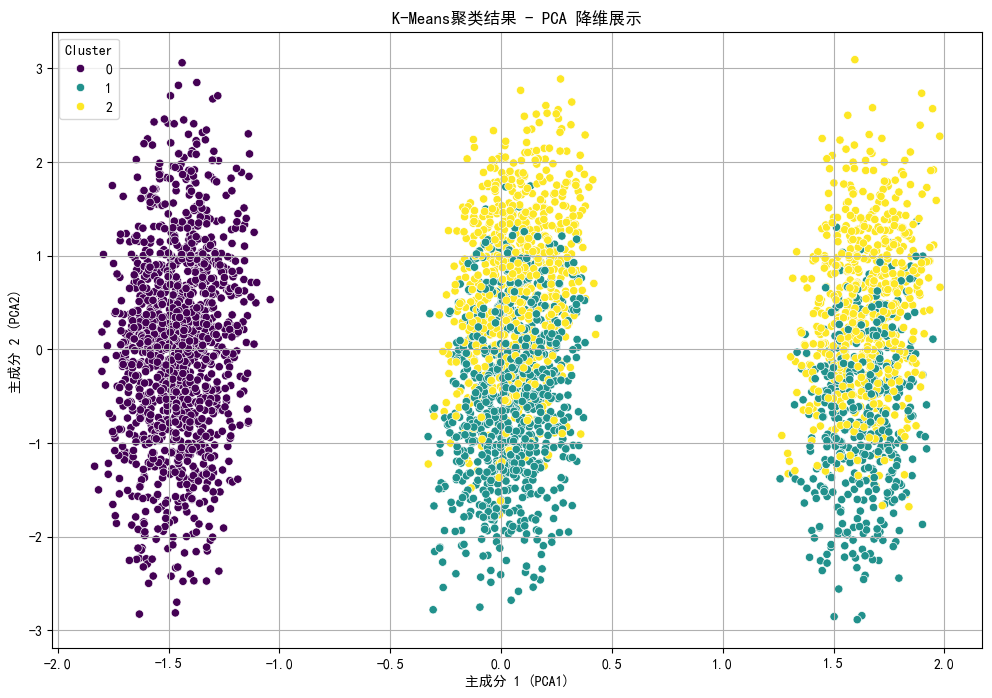

In [193]:
from sklearn.decomposition import PCA
# 使用 PCA 将数据降维到 2 维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 将 PCA 结果转为 DataFrame，并添加聚类标签
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = cluster_labels

# 绘制 PCA 降维后的聚类结果
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_pca_df['PCA1'], y=data_pca_df['PCA2'], hue=data_pca_df['Cluster'], palette='viridis', legend='full')
plt.title(f'K-Means聚类结果 - PCA 降维展示')
plt.xlabel('主成分 1 (PCA1)')
plt.ylabel('主成分 2 (PCA2)')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True)
plt.show()

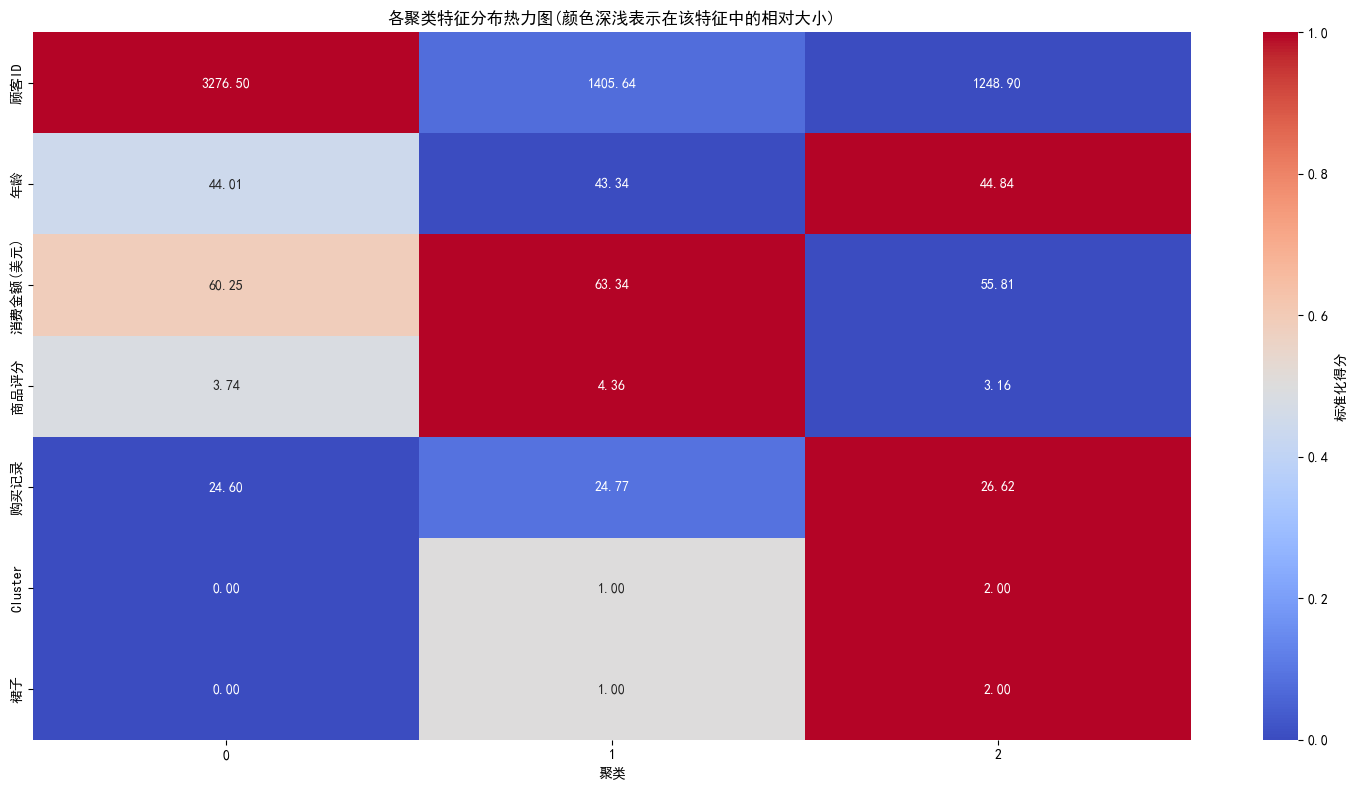

In [197]:
# 选择数值类型的列
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

# 计算每个聚类的特征均值
cluster_means = data.groupby('Cluster')[numerical_features].mean()

# 对每个特征进行归一化处理
normalized_means = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# 绘制热力图
plt.figure(figsize=(15, 8))
sns.heatmap(normalized_means.T, 
            cmap='coolwarm',
            center=0.5,      
            vmin=0, 
            vmax=1,
            annot=cluster_means.T.round(2),  # 显示原始均值而不是归一化后的值
            fmt='.2f',
            cbar_kws={'label': '标准化得分'})

plt.xlabel('聚类')
plt.title('各聚类特征分布热力图(颜色深浅表示在该特征中的相对大小)')
plt.tight_layout()
plt.show()


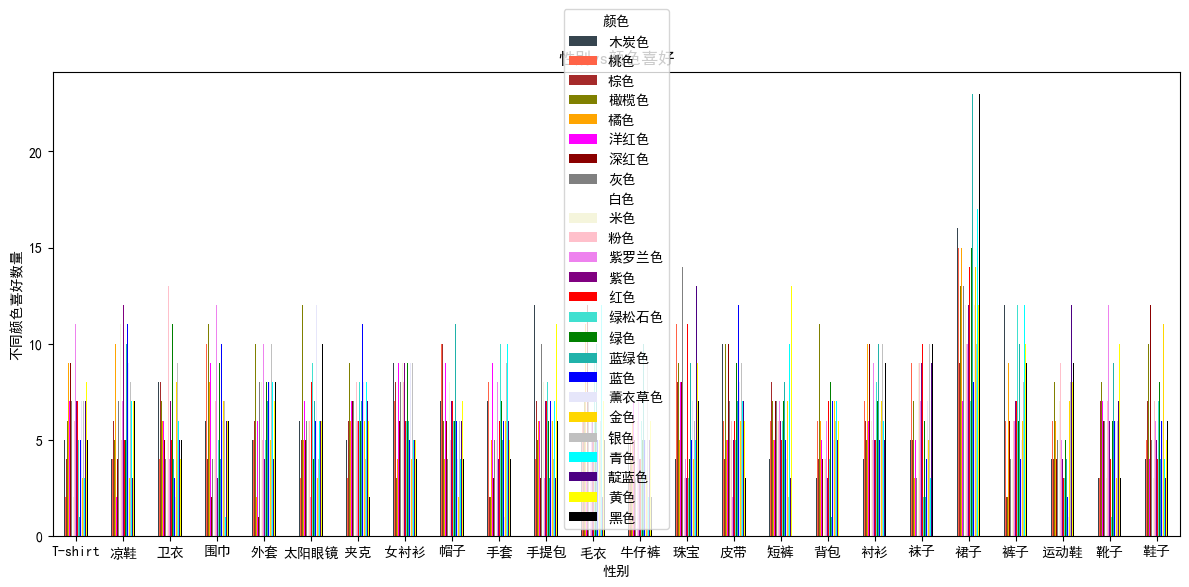

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd

# 读取数据集
data = pd.read_csv(r'F:\Jupyter notebook\统计建模\translated_final_shopping_trends.csv', encoding='gbk')


# 统计每个性别对应的颜色偏好
color_gender_stats = data.groupby(['购买的商品', '颜色']).size().unstack().fillna(0)

# 查看统计结果
print(color_gender_stats)
# 假设 color_gender_stats 是您已经处理的数据
# 自定义颜色对应每种颜色名称的RGB值或十六进制颜色代码
color_mapping = {
    '木炭色': '#36454F', 
    '桃色': '#FF6347', 
    '紫色': '#800080', 
    '橄榄色': '#808000', 
    '紫罗兰色': '#EE82EE', 
    '洋红色': '#FF00FF', 
    '深红色': '#8B0000', 
    '灰色': '#808080', 
    '白色': '#FFFFFF', 
    '米色': '#F5F5DC', 
    '粉色': '#FFC0CB', 
    '红色': '#FF0000', 
    '绿色': '#008000', 
    '蓝色': '#0000FF', 
    '蓝绿色': '#20B2AA', 
    '薰衣草色': '#E6E6FA', 
    '金色': '#FFD700', 
    '银色': '#C0C0C0', 
    '青色': '#00FFFF', 
    '黄色': '#FFFF00', 
    '黑色': '#000000',
    '绿松石色': '#40E0D0',  # Turquoise
    '棕色': '#A52A2A',      # Brown
    '橘色': '#FFA500',      # Orange
    '靛蓝色': '#4B0082'     # Indigo
}


# 绘制条形图，使用自定义颜色
color_gender_stats.plot(kind='bar', stacked=False, figsize=(12, 6), color=[color_mapping.get(col, '#000000') for col in color_gender_stats.columns])

# 设置标题和标签
plt.title('不同商品vs颜色喜好')
plt.xlabel('商品')
plt.ylabel('不同颜色喜好数量')
plt.xticks(rotation=0)

# 显示图像
plt.tight_layout()
plt.show()



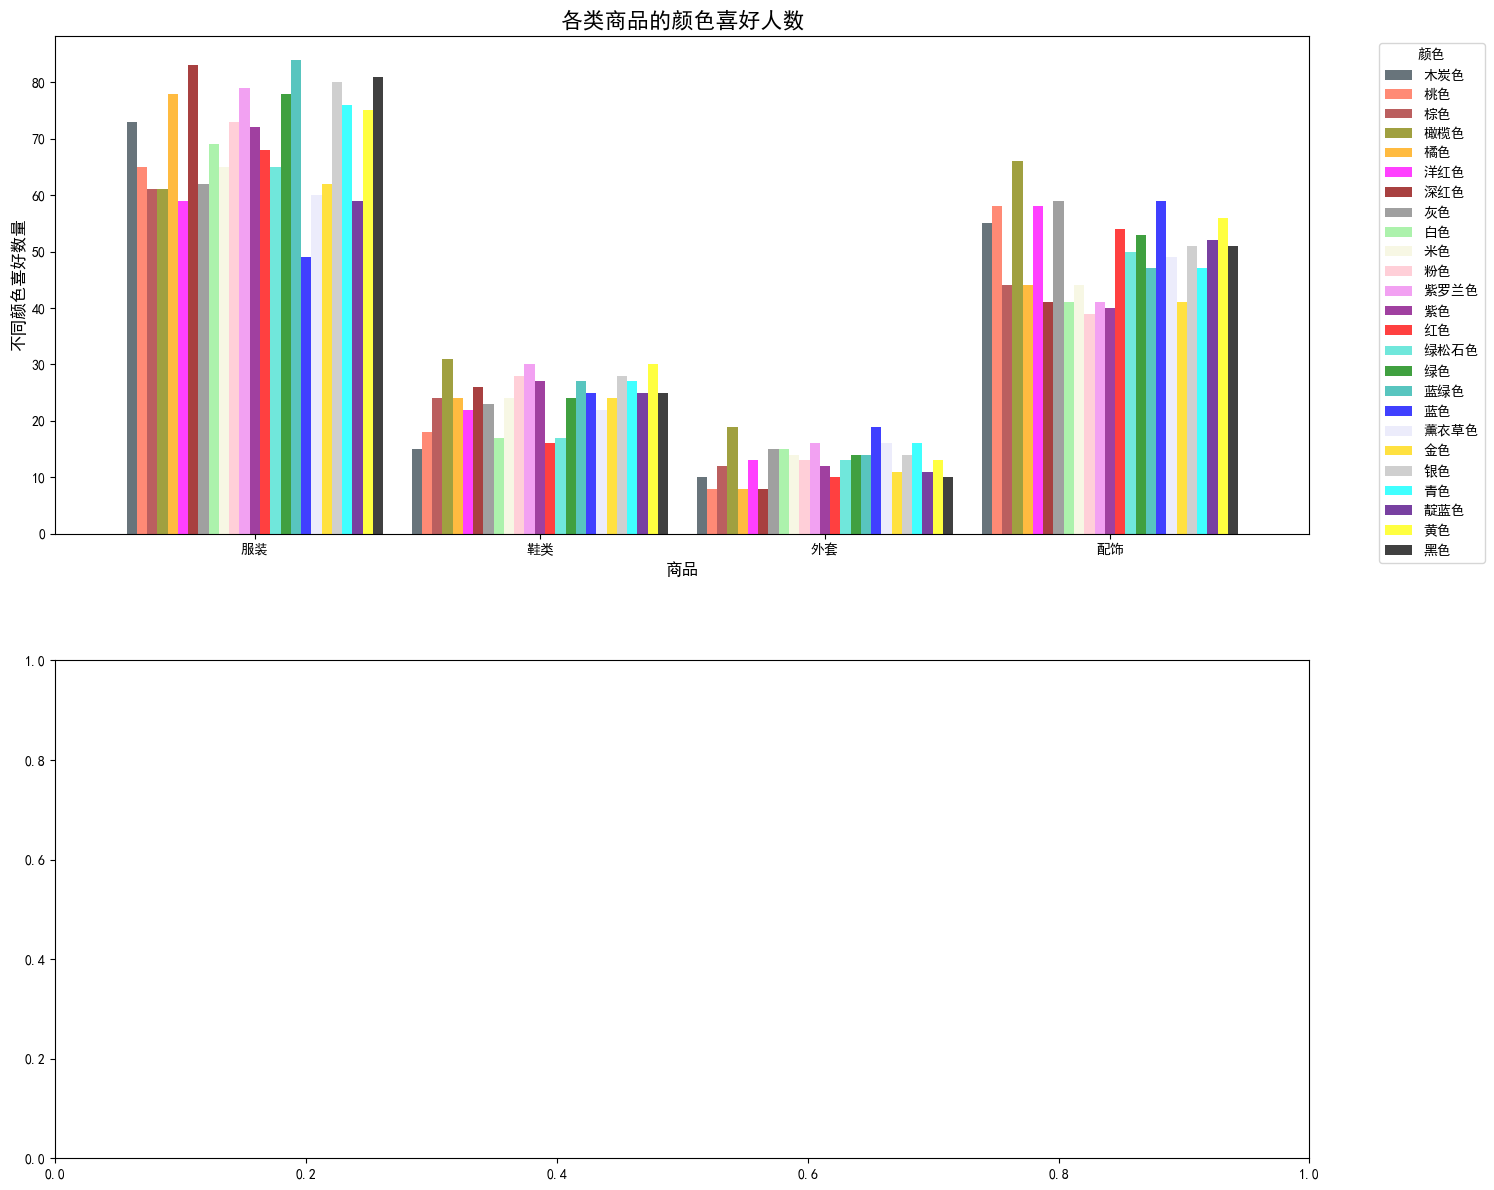

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据集
data = pd.read_csv(r'F:\Jupyter notebook\统计建模\translated_final_shopping_trends.csv', encoding='gbk')

# 统计每个性别对应的颜色偏好
color_gender_stats = data.groupby(['类别', '颜色']).size().unstack().fillna(0)

# 自定义颜色对应每种颜色名称的RGB值或十六进制颜色代码
color_mapping = {
    '木炭色': '#36454F', 
    '桃色': '#FF6347', 
    '紫色': '#800080', 
    '橄榄色': '#808000', 
    '紫罗兰色': '#EE82EE', 
    '洋红色': '#FF00FF', 
    '深红色': '#8B0000', 
    '灰色': '#808080', 
    '白色': '#90EE90', 
    '米色': '#F5F5DC', 
    '粉色': '#FFC0CB', 
    '红色': '#FF0000', 
    '绿色': '#008000', 
    '蓝色': '#0000FF', 
    '蓝绿色': '#20B2AA', 
    '薰衣草色': '#E6E6FA', 
    '金色': '#FFD700', 
    '银色': '#C0C0C0', 
    '青色': '#00FFFF', 
    '黄色': '#FFFF00', 
    '黑色': '#000000',
    '绿松石色': '#40E0D0',  # Turquoise
    '棕色': '#A52A2A',      # Brown
    '橘色': '#FFA500',      # Orange
    '靛蓝色': '#4B0082'     # Indigo
}

# 将数据分成两部分
# 假设我们根据商品类型将数据分为两部分，第一部分：T-shirt、外套、卫衣，第二部分：帽子、手套、鞋子等
group1 = color_gender_stats.loc[['服装', '鞋类', '外套','配饰'], :]


# 创建两个子图（2行1列）
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# 第一部分数据（group1）
group1.plot(kind='bar', stacked=False, ax=axes[0], 
            color=[color_mapping.get(col, '#000000') for col in group1.columns],
            width=0.9, alpha=0.75)
axes[0].set_title('各类商品的颜色喜好人数', fontsize=16)
axes[0].set_xlabel('商品', fontsize=12)
axes[0].set_ylabel('不同颜色喜好数量', fontsize=12)
axes[0].set_xticklabels(group1.index, rotation=0)
axes[0].legend(title='颜色', bbox_to_anchor=(1.05, 1), loc='upper left')



# 调整布局，避免重叠
plt.tight_layout()

# 显示图像
plt.show()


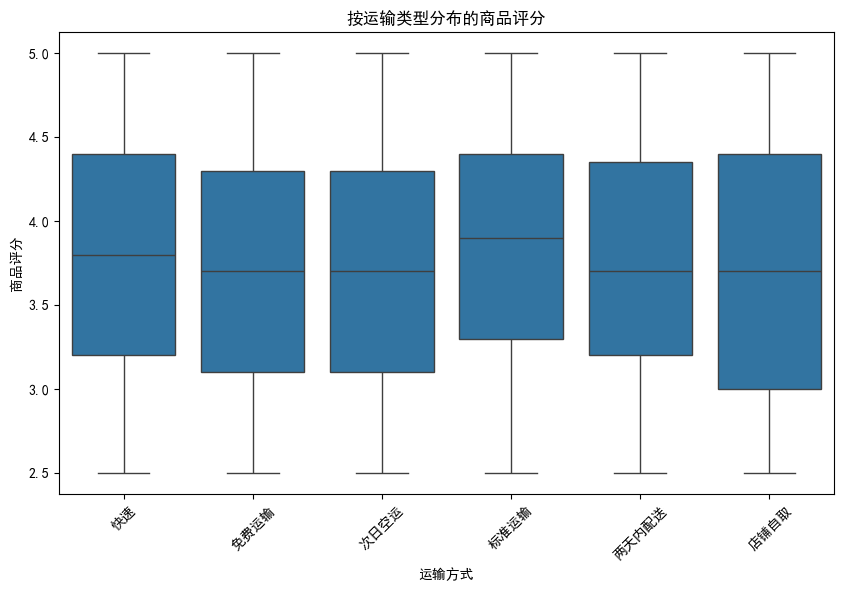

In [13]:
#用户评分与运输方式关系
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
# 读取数据，修正文件路径
data_new_csv = pd.read_csv('F:/Jupyter notebook/统计建模/translated_final_shopping_trends.csv', encoding='gbk')

# 清洗数据：确保评分和运输方式字段有效
data_clean = data_new_csv[['运输方式', '商品评分']].dropna()

# 可视化：使用箱型图展示不同运输方式下的用户评分分布
plt.figure(figsize=(10,6))
sns.boxplot(x='运输方式', y='商品评分', data=data_clean)
plt.title('按运输类型分布的商品评分')
plt.xlabel('运输方式')
plt.ylabel('商品评分')
plt.xticks(rotation=45)
plt.show()


In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 读取数据
data_new_csv = pd.read_csv('F:/Jupyter notebook/统计建模/translated_final_shopping_trends.csv', encoding='gbk')

# 清洗数据，提取季节、商品类型和购买金额
data_clean = data_new_csv[['季节', '类别', '消费金额(美元)']].dropna()

# 确保季节按照春夏秋冬的顺序排序
season_order = ['春季', '夏季', '秋季', '冬季']
data_clean['季节'] = pd.Categorical(data_clean['季节'], categories=season_order, ordered=True)

# 按季节和商品类型计算每个商品类别的总购买金额
seasonal_category_data = data_clean.groupby(['季节', '类别'])['消费金额(美元)'].sum().unstack()

# 显示按季节和商品类型汇总的购买金额
seasonal_category_data.plot(kind='bar', figsize=(12, 6))
plt.title('季节变化下的消费金额和商品类别')
plt.xlabel('季节')
plt.ylabel('消费总金额(美元)')
plt.xticks(rotation=45)
plt.legend(title='商品类别')
plt.show()

# 时间序列分析：分析每个商品类别的季节性购买金额
for category in seasonal_category_data.columns:
    print(f'Analyzing seasonal trends for category: {category}')
    
    # 获取某一商品类别的季节性数据
    category_data = seasonal_category_data[category]

    # 将季节性数据转化为时间序列格式（假设季节为1年周期的数据）
    category_data = category_data.sort_values()
    category_data.index = pd.to_datetime(category_data.index, format='%B')

    # 时间序列分解：趋势、季节性和残差
    decomposition = seasonal_decompose(category_data, model='additive', period=4)
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition for {category}')
    plt.show()

    # 使用SARIMA模型进行季节性预测
    sarima_model = SARIMAX(category_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
    sarima_result = sarima_model.fit()

    # 进行预测（未来4个季节）
    forecast = sarima_result.forecast(steps=4)  # 预测未来4个季节

    # 绘制预测结果
    plt.figure(figsize=(10,6))
    plt.plot(category_data.index, category_data, label='Historical Data')
    plt.plot(forecast.index, forecast, label='Forecasted Data', color='red')
    plt.title(f'Seasonal Purchase Amount Prediction using SARIMA for {category}')
    plt.xlabel('季节')
    plt.ylabel('消费总金额(美元)')
    plt.legend()
    plt.show()


Analyzing seasonal trends for category: 外套


ValueError: time data "夏季" doesn't match format "%B", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data_new_csv = pd.read_csv('F:/Jupyter notebook/统计建模/translated_final_shopping_trends.csv', encoding='gbk')

# 清洗数据，提取季节、商品类型和购买金额
data_clean = data_new_csv[['季节', '类别', '消费金额(美元)']].dropna()

# 筛选出服装类别数据
clothing_data = data_clean[data_clean['类别'] == '服装']

# 按季节汇总消费金额
seasonal_clothing_data = clothing_data.groupby('季节')['消费金额(美元)'].sum()

# 打印每个季节的消费金额数据
print(seasonal_clothing_data)

# 创建季节顺序
season_order = ['春季', '夏季', '秋季', '冬季']
seasonal_clothing_data = seasonal_clothing_data[season_order]

# 绘制季节变化图
plt.figure(figsize=(10, 6))
plt.plot(seasonal_clothing_data.index, seasonal_clothing_data.values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('服装消费金额与季节变化关系')
plt.xlabel('季节')
plt.ylabel('消费金额(美元)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



季节
冬季    27274
夏季    23078
春季    27692
秋季    26220
Name: 消费金额(美元), dtype: int64


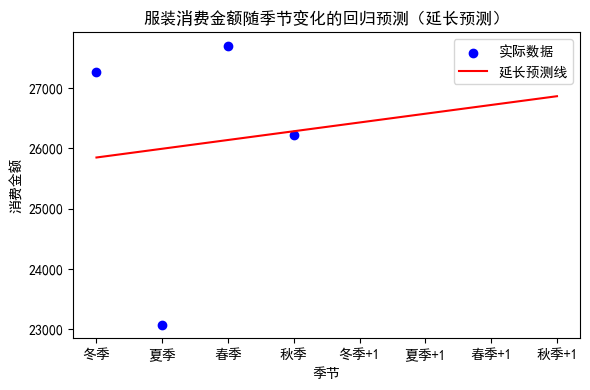

{'季节冬季': 25848.2,
 '季节夏季': 25993.4,
 '季节春季': 26138.6,
 '季节秋季': 26283.8,
 '季节冬季+1': 26429.0,
 '季节夏季+1': 26574.2,
 '季节春季+1': 26719.4,
 '季节秋季+1': 26864.600000000002}

In [232]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 数据：季节和消费金额
data = {
    '季节': ['冬季', '夏季', '春季', '秋季'],
    '消费金额': [27274, 23078, 27692, 26220]
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 将季节转换为数值型变量（例如，冬季=1, 夏季=2, 春季=3, 秋季=4）
season_map = {'冬季': 1, '夏季': 2, '春季': 3, '秋季': 4}
df['季节数值'] = df['季节'].map(season_map)

# 准备训练数据
X = df[['季节数值']]  # 特征：季节
y = df['消费金额']  # 目标：消费金额

# 创建回归模型并进行训练
model = LinearRegression()
model.fit(X, y)

# 预测原始数据和未来的数据（延长预测）
extended_X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])  # 添加更多季节，继续延长
extended_predicted_amounts = model.predict(extended_X)

# 输出预测结果
extended_predicted_results = {f"季节{season}": amount for season, amount in zip(['冬季', '夏季', '春季', '秋季', '冬季+1', '夏季+1', '春季+1', '秋季+1'], extended_predicted_amounts)}

# 可视化回归结果（延长预测线）
plt.figure(figsize=(6, 4))
plt.scatter(df['季节数值'], df['消费金额'], color='blue', label='实际数据')
plt.plot(extended_X, extended_predicted_amounts, color='red', label='延长预测线')
plt.xlabel('季节')
plt.ylabel('消费金额')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['冬季', '夏季', '春季', '秋季', '冬季+1', '夏季+1', '春季+1', '秋季+1'])
plt.title('服装消费金额随季节变化的回归预测（延长预测）')
plt.legend()
plt.tight_layout()  # 调整布局
plt.show()

extended_predicted_results




In [237]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd

# 设置文件路径
file_path = r"F:\Jupyter notebook\统计建模\translated_final_shopping_trends.csv"

# 加载数据，指定正确的编码
data = pd.read_csv(file_path, encoding='gbk')

# 选择相关的特征
features = ['年龄', '性别', '类别', '季节', '商品评分', '订阅状态']
target = '订阅状态'

# 编码类别特征
label_encoders = {}
for col in ['性别', '类别', '季节', '订阅状态']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 特征和目标变量
X = data[features]
y = data[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置XGBoost的参数
params = {
    'objective': 'reg:squarederror',  # 回归任务
    'max_depth': 6,
    'eta': 0.1,  # 学习率
    'subsample': 0.8,  # 样本采样
    'colsample_bytree': 0.8  # 特征采样
}

# 训练模型
num_round = 100  # 训练轮数
bst = xgb.train(params, dtrain, num_round)

# 预测
preds = bst.predict(dtest)

# 评估模型
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0002761986540212804


In [243]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 加载数据
file_path = r'F:\Jupyter notebook\统计建模\translated_final_shopping_trends.csv'  # 确保数据文件路径正确
data = pd.read_csv(file_path, encoding='gbk')

# 选择相关特征和目标变量
features = ['季节', '运输方式', '支付方式']  # 季节、运输方式、支付方式
target = '消费金额(美元)'  # 目标变量：购买金额

# 对类别变量进行标签编码
label_encoders = {}
for col in features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # 转换为数值型
    label_encoders[col] = le

# 特征和目标变量
X = data[features]
y = data[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建DMatrix（XGBoost特有的数据格式）
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置XGBoost的参数
params = {
    'objective': 'reg:squarederror',  # 回归任务
    'max_depth': 6,
    'eta': 0.1,  # 学习率
    'subsample': 0.8,  # 样本采样
    'colsample_bytree': 0.8  # 特征采样
}

# 训练模型
num_round = 100  # 训练轮数
bst = xgb.train(params, dtrain, num_round)

# 预测
preds = bst.predict(dtest)

# 评估模型：均方误差（MSE）
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")

# 输出预测结果
print("Predictions:", preds)

# 绘制特征重要性
xgb.plot_importance(bst, importance_type='weight')
plt.title('特征重要性')
plt.show()


Mean Squared Error: 569.9553692125072
Predictions: [62.1855   57.917404 59.51794  61.87848  65.43125  55.8994   58.518932
 59.504185 68.6718   62.69518  63.43447  59.328358 54.39389  61.630257
 68.6718   56.571167 61.630257 57.17479  55.8837   65.85719  64.06437
 59.67003  59.86998  56.666653 63.35513  63.310936 59.103096 61.022507
 61.630257 54.66881  62.80734  58.769573 60.80355  55.659363 56.666653
 65.41552  60.48371  58.82459  61.80825  58.359676 57.790604 61.051785
 61.80825  54.63486  59.573864 60.80355  68.2403   64.671814 59.86998
 59.573864 62.161728 61.549965 60.909374 64.06437  55.79981  59.86998
 55.8994   55.8837   60.07683  58.54944  61.99073  54.63486  68.2403
 60.72227  64.46213  64.08502  59.67003  58.179367 58.909378 61.630257
 60.336353 65.41552  58.79107  60.231197 62.69518  64.46213  64.08502
 61.80825  60.332726 52.9956   63.664547 63.365906 56.34741  63.43447
 56.666653 56.300594 62.69518  56.93502  59.066875 56.93502  58.77099
 60.231197 60.851635 54.816406 60.

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# 筛选出“服装”类别的数据
clothing_data = data[data['类别'] == '鞋类']

# 统计不同运输方式的数量
shipping_counts = clothing_data['运输方式'].value_counts()

# 绘制饼图
plt.figure(figsize=(7, 7))
shipping_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('鞋类购买的运输方式分布')
plt.ylabel('')
plt.show()


In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 提取 "购买的商品" 列，并计算每个商品的出现次数
item_counts = data['购买的商品'].value_counts()

# 设置中文字体路径（确保路径正确）
font_path = "E:/software/SimHei font/SimHei/SimHei.ttf"  # 请确保字体路径正确

# 创建词云对象，设置样式并传递字体路径
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path  # 设置字体路径
).generate_from_frequencies(item_counts)

# 显示词云图
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('购买商品的词云图', fontsize=20)
plt.show()

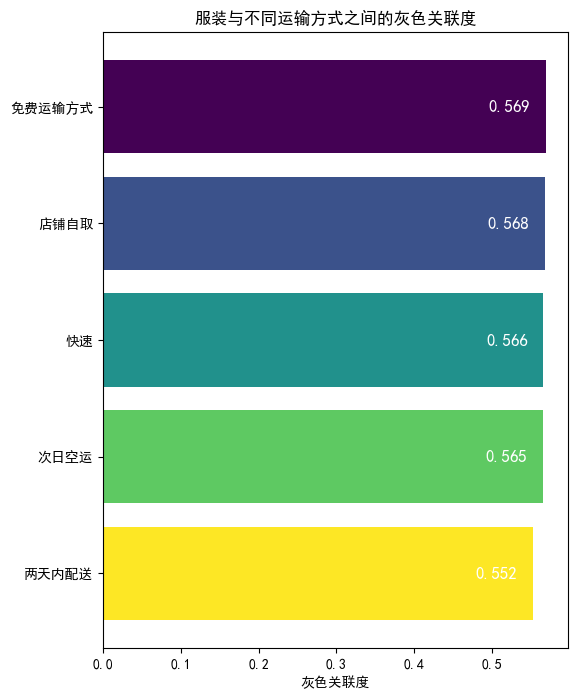

In [44]:
#服装与不同运输方式之间的灰色关联度
import matplotlib.pyplot as plt
import numpy as np

# Data: Shipping methods and their respective grey relational degrees
shipping_types = ['免费运输方式', '店铺自取', '快速', '次日空运', '两天内配送', '标准']
grey_relational_degrees = [0.569, 0.568, 0.566, 0.565, 0.552]

# Sort the data from highest to lowest grey relational degree
sorted_indices = np.argsort(grey_relational_degrees)[::-1]  # Sorting in descending order
sorted_shipping_types = [shipping_types[i] for i in sorted_indices]
sorted_grey_relational_degrees = [grey_relational_degrees[i] for i in sorted_indices]

# Plotting the inverted funnel chart with more vivid colors
fig, ax = plt.subplots(figsize=(6, 8))

# Plot the funnel (stacked bars) with more vivid colors
bars = ax.barh(sorted_shipping_types, sorted_grey_relational_degrees, color=plt.cm.viridis(np.linspace(0, 1, len(sorted_grey_relational_degrees))))

# Invert the y-axis to have the largest grey relational degree at the bottom
ax.invert_yaxis()

# Add labels and title
ax.set_xlabel('灰色关联度')
ax.set_title('服装与不同运输方式之间的灰色关联度')

# Adding the text labels for each bar (grey relational degree values)
for bar, degree in zip(bars, sorted_grey_relational_degrees):
    ax.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height() / 2,
            f'{degree:.3f}', va='center', ha='right', color='white', fontsize=12)

plt.show()



In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 读取数据集
data = pd.read_csv(r"F:\Jupyter notebook\统计建模\translated_final_shopping_trends.csv", encoding='gbk')

# 创建目标变量：购买的商品是否为服装
data['是否购买服装'] = data['类别'].apply(lambda x: 1 if x == '服装' else 0)

# 选择自变量：例如购买频率、年龄、性别等
X = data[['年龄', '性别', '购买频率']]  # 选择有可能影响购买的变量

# 将类别数据转换为数字编码：性别、购买频率
le_gender = LabelEncoder()
le_frequency = LabelEncoder()

# 使用 .loc 避免 SettingWithCopyWarning
X.loc[:, '性别'] = le_gender.fit_transform(X['性别'])
X.loc[:, '购买频率'] = le_frequency.fit_transform(X['购买频率'])

# 目标变量
y = data['是否购买服装']

# 数据分割：80%训练集，20%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建逻辑回归模型（可以选择增加 max_iter 和 class_weight='balanced'）
model = LogisticRegression(max_iter=200, class_weight='balanced')

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 输出模型评估指标（设置中文标签）
target_names = ['非服装', '服装']
print("分类报告：\n", classification_report(y_test, y_pred, target_names=target_names))
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred))



分类报告：
               precision    recall  f1-score   support

         非服装       0.56      0.50      0.53       434
          服装       0.45      0.50      0.47       346

    accuracy                           0.50       780
   macro avg       0.50      0.50      0.50       780
weighted avg       0.51      0.50      0.50       780

混淆矩阵：
 [[217 217]
 [172 174]]


In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']

# 来自图像的数据
features = ['消费金额(美元)', '季节', '商品评分', '订阅状态']
importance = [0.060817, 0.038173, 0.020630, 0.019353]

# 创建3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 创建3D饼状图
theta = np.linspace(0, 2 * np.pi, len(importance), endpoint=False)

# 设置3D效果的高度
z = np.zeros(len(importance))
dx = dy = np.ones(len(importance))
dz = importance

ax.bar3d(theta, z, np.zeros(len(importance)), dx, dy, dz, shade=True)

# 设置标签
ax.set_xticks(theta)
ax.set_xticklabels(features)

# 显示图表
plt.title("影响服装购买频率的不同因素重要程度")
plt.show()




E:\software\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
E:\software\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


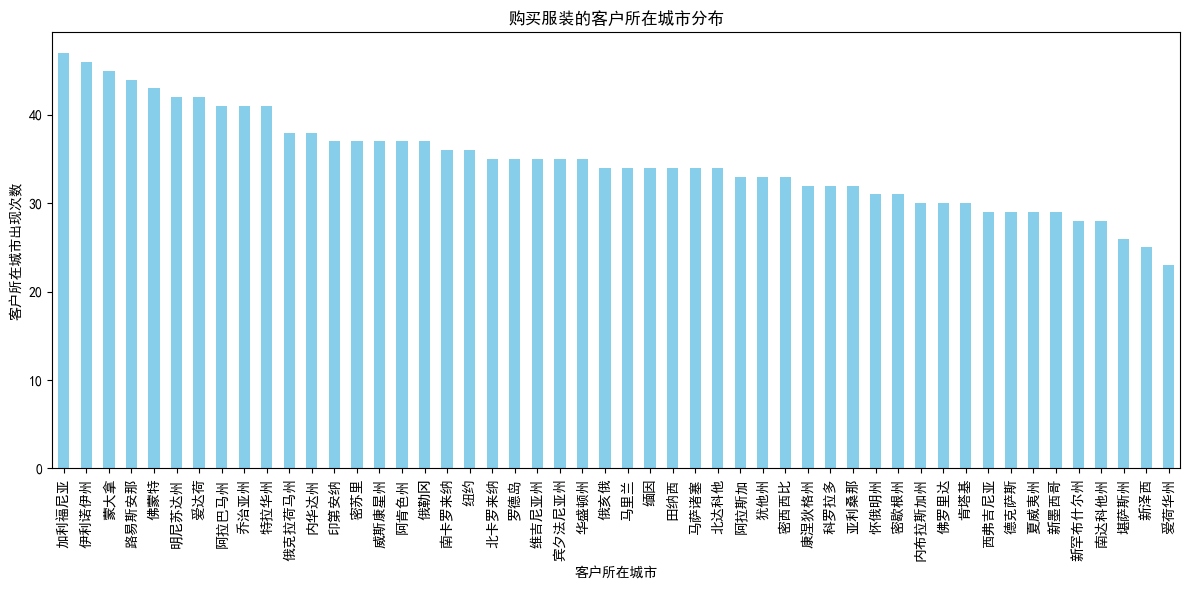

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
df_purchase = pd.read_excel('F:/Jupyter notebook/统计建模/服装与购买地点.xlsx')

# 计算每个地点的出现次数
location_counts = df_purchase['地点'].value_counts()

# 创建直方图
fig, ax = plt.subplots(figsize=(12, 6))
location_counts.plot(kind='bar', ax=ax, color='skyblue')

# 添加标签和标题
plt.xlabel('客户所在城市')
plt.ylabel('客户所在城市出现次数')
plt.title('购买服装的客户所在城市分布')

# 显示图表
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


E:\software\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
E:\software\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


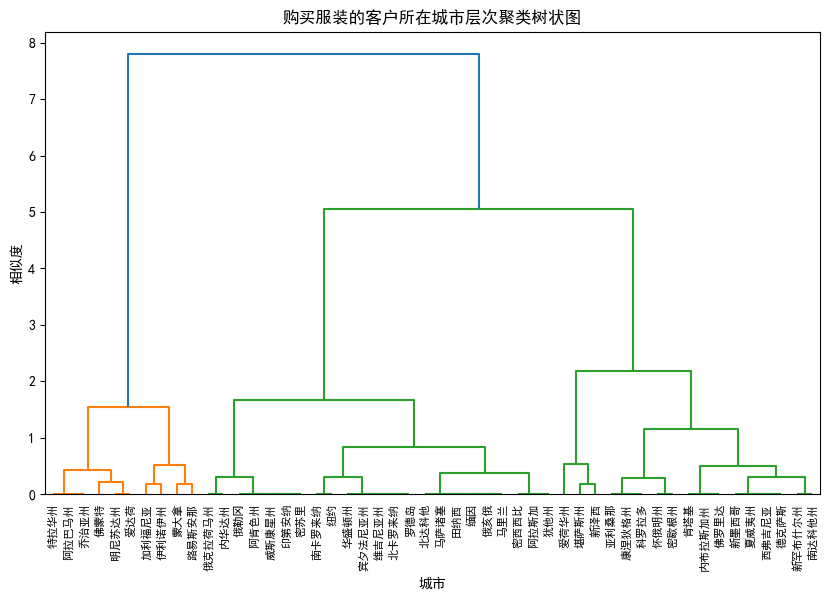

      城市  购买数量  聚类标签
0  加利福尼亚    47     1
1  伊利诺伊州    46     1
2    蒙大拿    45     1
3  路易斯安那    44     1
4    佛蒙特    43     1


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 读取数据
file_path = r'F:\Jupyter notebook\统计建模\服装与购买地点.xlsx'  # 文件路径已更新
data = pd.read_excel(file_path)

# 统计每个城市的购买数量（即城市出现的次数）
city_counts = data['地点'].value_counts().reset_index()
city_counts.columns = ['城市', '购买数量']

# 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(city_counts[['购买数量']])

# 使用层次聚类进行分组
model = AgglomerativeClustering(n_clusters=4)  # 假设将城市分成4个群组
city_counts['聚类标签'] = model.fit_predict(scaled_data)

# 绘制层次聚类的树状图
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 6))
plt.title('购买服装的客户所在城市层次聚类树状图')
plt.xlabel('城市')
plt.ylabel('相似度')
dendrogram(linked, labels=city_counts['城市'].values, leaf_rotation=90)
plt.show()

# 显示城市与其聚类标签
print(city_counts.head())


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = "F:/Jupyter notebook/统计建模/支付方式分析.xlsx"  # 你的文件路径
df = pd.read_excel(file_path)

# 计算每种支付方式的消费总金额
payment_totals = df.groupby('支付方式')['消费金额(美元)'].sum()

# 获取柱状图的标签和数据
labels = payment_totals.index
data = payment_totals.values

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, data, color=['red', 'orange', 'yellow', 'green', 'purple', 'blue', 'black'][:len(data)])

# 在每个柱子上方显示数字
for bar in bars:
    yval = bar.get_height()  # 获取柱子的高度（即消费总金额）
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

# 设置标题和标签
plt.title('每种支付方式对应的消费总金额')
plt.xlabel('购买商品支付方式')
plt.ylabel('消费总金额 (美元)')

# 显示图表
plt.xticks(rotation=45)  # 如果标签太长，可以旋转x轴标签
plt.show()



E:\software\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
E:\software\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


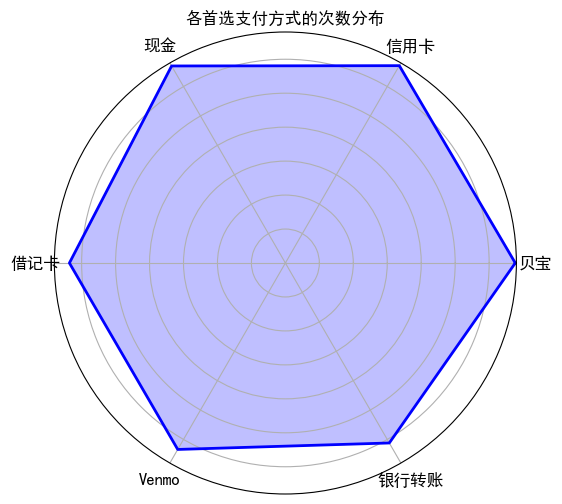

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 支付方式和次数
labels = payment_counts.index
data = payment_counts.values

# 设置雷达图的角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# 使得雷达图闭合
data = np.concatenate((data, [data[0]]))
angles += angles[:1]

# 创建雷达图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 绘制雷达图
ax.fill(angles, data, color='blue', alpha=0.25)
ax.plot(angles, data, color='blue', linewidth=2)

# 设置雷达图的标签
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# 设置标题
ax.set_title('各首选支付方式的次数分布')

# 显示雷达图
plt.show()


In [3]:
print(data.columns)


Index(['顾客ID', '年龄', '性别', '购买的商品', '类别', '消费金额(美元)', '地点', '尺码', '颜色', '季节',
       '商品评分', '订阅状态', '支付方式', '运输方式', '是否应用折扣', '是否使用优惠码', '购买记录', '首选支付方式',
       '购买频率'],
      dtype='object')


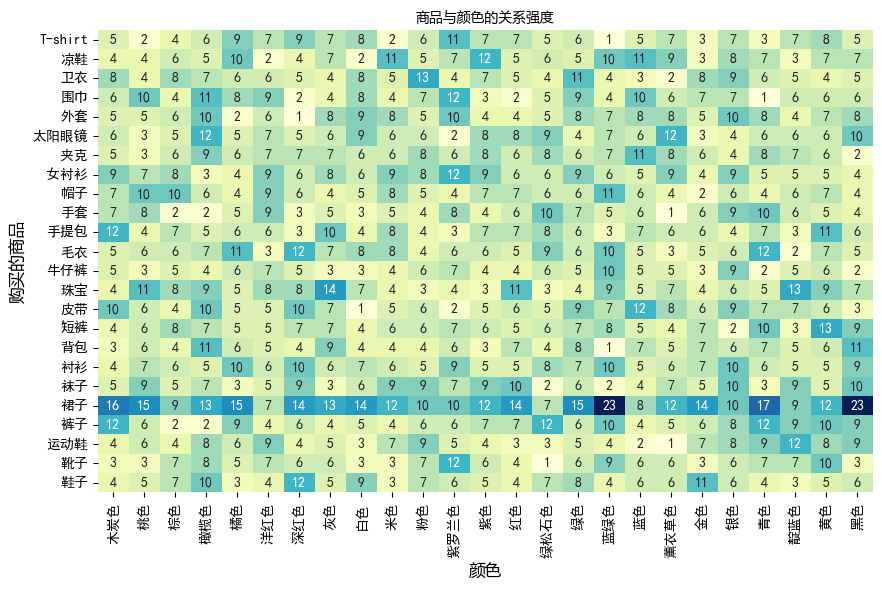

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

from pylab import mpl
 
# 设置中文显示字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 修改为您本地的文件路径
file_path = r'F:\Jupyter notebook\统计建模\颜色与商品.xlsx'  # Excel文件路径
font_path = r'E:\software\SimHei font\SimHei\微软雅黑.ttf'  # 字体文件路径

# 加载自定义字体
prop = fm.FontProperties(fname=font_path)

# 读取Excel文件
df_newest = pd.read_excel(file_path, sheet_name='Sheet1')

# 创建透视表来展示商品与颜色的关系
heatmap_data = df_newest.pivot_table(index='购买的商品', columns='颜色', aggfunc='size', fill_value=0)

# 创建热力图来展示商品与颜色之间的关系
plt.figure(figsize=(10, 6))

# 绘制热力图
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar=False)

# 设置x轴和y轴标签以及标题
plt.xlabel('颜色', fontsize=12, fontproperties=prop)
plt.ylabel('购买的商品', fontsize=12, fontproperties=prop)
plt.title('商品与颜色的关系强度', fontsize=14, fontproperties=prop)

# 显示图表
plt.show()


In [11]:
import pandas as pd
import folium
import branca.colormap as cm
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# ========== 1. 准备数据：地点 + 出现次数 ==========
df_data = pd.DataFrame({
    "地点": [
        "加利福尼亚", "伊利诺伊", "蒙大拿", "路易斯安那", "佛蒙特",
        "明尼苏达州", "爱达荷", "阿肯色州", "乔治亚州", "特拉华州",
        "俄克萨克州", "内华达", "印第安纳", "密苏里", "阿肯色",
        "南卡罗来纳", "纽约", "北卡罗来纳", "罗德岛", "维吉尼亚州",
        "宾夕法尼亚", "马里兰", "缅因", "堪萨斯", "爱荷华",
        "密歇根", "俄亥俄", "德克萨斯", "怀俄明", "新墨西哥",
        "亚利桑那", "科罗拉多", "夏威夷", "华盛顿", "俄勒冈",
        "佛罗里达", "阿拉斯加", "威斯康星", "马萨诸塞", "新泽西",
        "阿拉巴马州", "田纳西", "肯塔基", "南达科他", "北达科他",
        "宾夕法尼亚", "蒙大拿", "罗德岛", "康涅狄格", "新罕布什尔"
    ],
    "出现次数": [
        47, 45, 44, 45, 42,
        42, 41, 39, 39, 39,
        38, 37, 37, 37, 36,
        36, 36, 35, 35, 35,
        34, 34, 34, 34, 34,
        33, 33, 33, 32, 32,
        31, 30, 29, 29, 29,
        30, 28, 28, 25, 25,
        25, 25, 25, 25, 25,
        25, 25, 25, 25, 25
    ]
})

# ========== 2. 地理编码 ==========
geolocator = Nominatim(user_agent="city_map")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 为容易识别，建立一个映射字典
place_mapping = {
    "内华达": "内华达州, USA",
    "罗德岛": "罗德岛州, USA",
    "马里兰": "马里兰州, USA",
    "缅因": "缅因州, USA"
}

df_data["lat"] = None
df_data["lon"] = None

for i, row in df_data.iterrows():
    place_name = row["地点"]
    # 如果在映射字典中，则用更明确的名称
    query = f"{place_name}, USA"
    if place_name in place_mapping:
        query = place_mapping[place_name]
    location = geocode(query)
    if location:
        df_data.at[i, "lat"] = location.latitude
        df_data.at[i, "lon"] = location.longitude
    else:
        print(f"警告：无法地理编码 '{place_name}'，请检查拼写或加更多信息。")

# 过滤掉无法获取坐标的行
df_data = df_data.dropna(subset=["lat", "lon"])

# ========== 3. 创建地图对象 ==========
m = folium.Map(location=[40, -95], zoom_start=4)

# ========== 4. 创建颜色映射（出现次数越多颜色越红）==========
min_count = df_data["出现次数"].min()
max_count = df_data["出现次数"].max()
colormap = cm.LinearColormap(["green", "yellow", "red"], vmin=min_count, vmax=max_count)
colormap.caption = "出现次数"

# ========== 5. 遍历所有地点，添加 CircleMarker ==========
for i, row in df_data.iterrows():
    place_name = row["地点"]
    count = row["出现次数"]
    lat = row["lat"]
    lon = row["lon"]

    radius = count / 5.0  # 根据出现次数设置点的大小
    color = colormap(count)

    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{place_name}：{count}"
    ).add_to(m)

# 将颜色图例添加到地图
colormap.add_to(m)

# ========== 6. 保存地图 ==========
m.save("floths_cities_map.html")
print("地图已保存为 floths_cities_map.html，可用浏览器打开查看。")


地图已保存为 floths_cities_map.html，可用浏览器打开查看。


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# 读取数据
df = pd.read_excel('C:/Users/Lee18/Desktop/类别与运输方式.xlsx')


# 对“类别”、“地点”、“支付方式”以及“运输方式”进行标签编码
le_category = LabelEncoder()
df['类别_encoded'] = le_category.fit_transform(df['类别'])

le_location = LabelEncoder()
df['地点_encoded'] = le_location.fit_transform(df['地点'])

le_payment = LabelEncoder()
df['支付方式_encoded'] = le_payment.fit_transform(df['支付方式'])

le_transport = LabelEncoder()
df['运输方式_encoded'] = le_transport.fit_transform(df['运输方式'])

# 特征矩阵 X 和目标 y
X = df[['类别_encoded', '地点_encoded', '支付方式_encoded']]
y = df['运输方式_encoded']

# 1. 随机森林模型分析
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_feature_importances = rf.feature_importances_

# 2. 互信息分析
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# 输出结果
print("随机森林特征重要性:", rf_feature_importances)
print("互信息分析结果:", mi_scores)

随机森林特征重要性: [0.05753474 0.83020545 0.1122598 ]
互信息分析结果: [0.00120632 0.02902934 0.00257001]


随机森林特征重要性: [0.05753474 0.83020545 0.1122598 ]
互信息分析结果: [0.00120632 0.02902934 0.00257001]


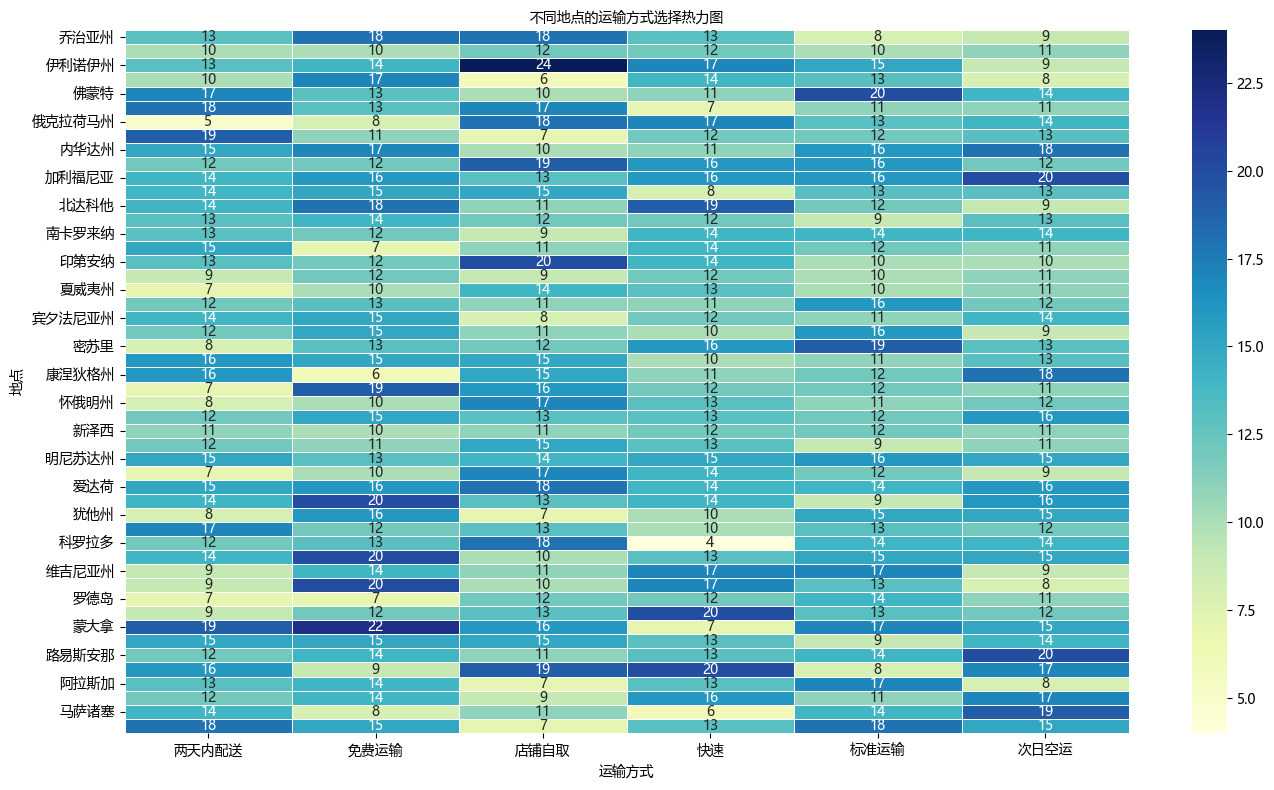

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 读取数据
file_path = r"F:\Jupyter notebook\统计建模\类别与运输方式.xlsx"
xls_new_data = pd.ExcelFile(file_path)
df_new_data = pd.read_excel(xls_new_data, sheet_name='Sheet1')

# 统计不同地点和运输方式的选择频次
transport_by_city = df_new_data.groupby(['地点', '运输方式']).size().unstack().fillna(0)

# 加载自定义字体（微软雅黑）
font_path = r"E:\software\SimHei font\SimHei\微软雅黑.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

# 设置全局字体
plt.rcParams['font.family'] = font_prop.get_name()

# 生成热力图
plt.figure(figsize=(14, 8))

# 创建热力图
sns.heatmap(transport_by_city, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)

# 添加标题和标签
plt.title('不同地点的运输方式选择热力图', fontproperties=font_prop)
plt.xlabel('运输方式', fontproperties=font_prop)
plt.ylabel('地点', fontproperties=font_prop)

# 显示图表
plt.tight_layout()
plt.show()
